In [1]:
# Machine Learning 
# HW1
# Shanle Yao
# 800962310
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1.a

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
train_data = data[['area','bedrooms','bathrooms','stories','parking','price']][0:int(len(data)*0.7)]

In [4]:
test_data = data[['area','bedrooms','bathrooms','stories','parking','price']][int(len(data)*0.7):]

In [5]:
# Question 1a
# Set up all the columns for training
X_1 = train_data['area'].values
X_2 = train_data['bedrooms'].values
X_3 = train_data['bathrooms'].values
X_4 = train_data['stories'].values
X_5 = train_data['parking'].values
Y = train_data['price'].values
train_size = len(Y)
X_0 = np.ones((train_size,1))

In [6]:
# Question 1a
# Set up all the columns for testing
X_1_test = test_data['area'].values
X_2_test = test_data['bedrooms'].values
X_3_test = test_data['bathrooms'].values
X_4_test = test_data['stories'].values
X_5_test = test_data['parking'].values
Y_test = test_data['price'].values
test_size  = len(Y_test)
X_0_test = np.ones((test_size,1))

In [7]:
# Functions to compute cost and do gradient descent
def compute_cost(X,Y,theta,m):
    pred = X.dot(theta)
    errors = np.subtract(pred,Y)
    sqrErr = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErr)
    return J

def gradient_descent(X,Y,X_test,Y_test,theta,alpha,iterations,train_size,test_size):
    cost_history = np.zeros(iterations)
    cost_history_valid = np.zeros(iterations)
    for i in range(iterations):
        pred = X.dot(theta)
        pred_valid = X_test.dot(theta)
        errors = np.subtract(pred,Y)
        errors_valid = np.subtract(pred_valid,Y_test)
        sum_delta = (alpha / train_size) * X.transpose().dot(errors)
        sum_delta_valid = (alpha / test_size) * X_test.transpose().dot(errors_valid)
        theta = theta - sum_delta
        cost_history[i] = compute_cost(X,Y,theta,train_size)
        cost_history_valid[i] = compute_cost(X_test,Y_test,sum_delta_valid,test_size)
    return theta, cost_history, cost_history_valid


In [8]:
# reshape train and test data
# X1
X_1 = X_1.reshape(train_size,1)
X_1_test = X_1_test.reshape(test_size,1)

# X2
X_2 = X_2.reshape(train_size,1)
X_2_test = X_2_test.reshape(test_size,1)

# X3
X_3 = X_3.reshape(train_size,1)
X_3_test = X_2_test.reshape(test_size,1)

# X4
X_4 = X_4.reshape(train_size,1)
X_4_test = X_2_test.reshape(test_size,1)

# X5
X_5 = X_5.reshape(train_size,1)
X_5_test = X_5_test.reshape(test_size,1)


In [9]:
# Set X input as combination of X0~X_5
X_input  = np.hstack((X_0,X_1,X_2,X_3,X_4, X_5))

# Set X_valid input as combination of X0_test ~ X_5_test
X_input_validation = np.hstack((X_0_test,X_1_test,X_2_test,X_3_test,X_4_test, X_5_test))

In [10]:
# training
iterations = 100;
alpha_list = [0.01,0.025,0.05,0.075,0.1]
Q1_theta = {}
Q1_cost_train = {}
Q1_cost_valid = {}
for alpha in alpha_list:
    theta = [0.,0.,0.,0.,0.,0.]
    theta, cost_hist,cost_valid_hist = gradient_descent(X_input,Y,X_input_validation,Y_test,theta,alpha,iterations,train_size,test_size)
    Q1_theta[alpha] = theta
    Q1_cost_train[alpha] = cost_hist
    Q1_cost_valid[alpha] = cost_valid_hist

<ipython-input-7-e9cb99871cb3>:5: RuntimeWarning: overflow encountered in square
  sqrErr = np.square(errors)
<ipython-input-7-e9cb99871cb3>:19: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta


In [11]:
Q1_theta

{0.01: array([nan, nan, nan, nan, nan, nan]),
 0.025: array([nan, nan, nan, nan, nan, nan]),
 0.05: array([nan, nan, nan, nan, nan, nan]),
 0.075: array([nan, nan, nan, nan, nan, nan]),
 0.1: array([nan, nan, nan, nan, nan, nan])}

In [12]:
Q1_cost_train

{0.01: array([2.03617842e+024, 2.79484947e+035, 3.83619799e+046, 5.26554835e+057,
        7.22746832e+068, 9.92039097e+079, 1.36166847e+091, 1.86902010e+102,
        2.56540870e+113, 3.52126861e+124, 4.83327768e+135, 6.63413552e+146,
        9.10598500e+157, 1.24988346e+169, 1.71558450e+180, 2.35480368e+191,
        3.23219309e+202, 4.43649391e+213, 6.08951187e+224, 8.35843700e+235,
        1.14727536e+247, 1.57474507e+258, 2.16148810e+269, 2.96684898e+280,
        4.07228376e+291, 5.58959863e+302,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
      

In [13]:
Q1_cost_valid

{0.01: array([1.22916658e+023, 3.05219817e+034, 4.18942763e+045, 5.75038978e+056,
        7.89295952e+067, 1.08338412e+079, 1.48704825e+090, 2.04111583e+101,
        2.80162654e+112, 3.84550017e+123, 5.27831648e+134, 7.24499380e+145,
        9.94444637e+156, 1.36497030e+168, 1.87355218e+179, 2.57162942e+190,
        3.52980714e+201, 4.84499763e+212, 6.65022226e+223, 9.12806560e+234,
        1.25291424e+246, 1.71974453e+257, 2.36051371e+268, 3.24003066e+279,
        4.44725171e+290, 6.10427799e+301,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
      

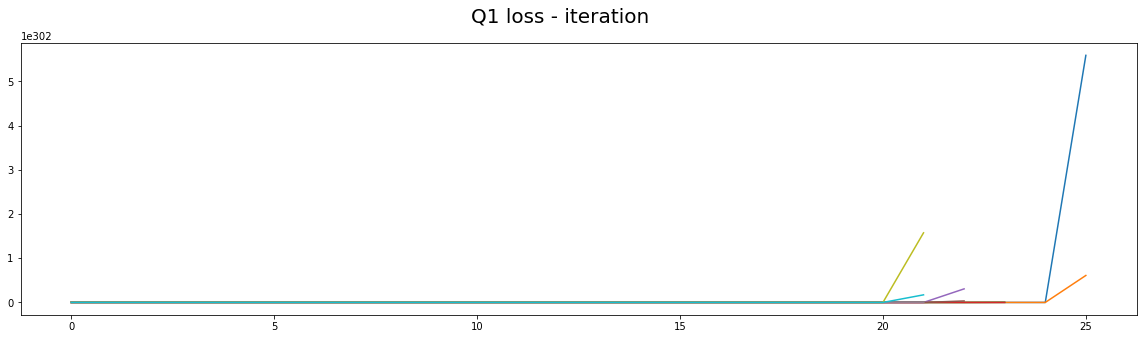

In [14]:
# plot
iteration = np.arange(iterations)
plt.figure(figsize = (20,5)).suptitle('Q1 loss - iteration',fontsize = 20)
for alpha in alpha_list:
    plt.plot(iteration,Q1_cost_train[alpha])
    plt.plot(iteration,Q1_cost_valid[alpha])
plt.show()

## Q2.a

In [15]:
# normalized_train_df
normalized_train_df = (train_data-train_data.min())/(train_data.max()-train_data.min())
normalized_test_df = (test_data-test_data.min())/(test_data.max()-test_data.min())

In [16]:
# standarization_train_df
standarization_train_df =(train_data-train_data.mean())/train_data.std()
standarization_test_df =(test_data-test_data.mean())/test_data.std()

In [17]:
# Question 2 - normalization
# Set up all the columns for training
X_1_norm = normalized_train_df['area'].values
X_2_norm = normalized_train_df['bedrooms'].values
X_3_norm = normalized_train_df['bathrooms'].values
X_4_norm = normalized_train_df['stories'].values
X_5_norm = normalized_train_df['parking'].values
Y_norm = normalized_train_df['price'].values
train_size   = len(Y_norm)
X_0 = np.ones((train_size,1))
# Set up all the columns for testing
X_1_norm_test = normalized_test_df['area'].values
X_2_norm_test = normalized_test_df['bedrooms'].values
X_3_norm_test = normalized_test_df['bathrooms'].values
X_4_norm_test = normalized_test_df['stories'].values
X_5_norm_test = normalized_test_df['parking'].values
Y_norm_test = normalized_test_df['price'].values
test_size  = len(Y_norm_test)
X_0_test = np.ones((test_size,1))

In [18]:
# X1
X_1_norm = X_1_norm.reshape(train_size,1)
X_1_norm_test = X_1_norm_test.reshape(test_size,1)
# X2
X_2_norm = X_2_norm.reshape(train_size,1)
X_2_norm_test=X_2_norm_test.reshape(test_size,1)
# X3
X_3_norm = X_3_norm.reshape(train_size,1)
X_3_norm_test = X_3_norm_test.reshape(test_size,1)
# X4
X_4_norm = X_4_norm.reshape(train_size,1)
X_4_norm_test = X_4_norm_test.reshape(test_size,1)
# X5
X_5_norm = X_5_norm.reshape(train_size,1)
X_5_norm_test = X_5_norm_test.reshape(test_size,1)


In [19]:
# Question 2 - standard
# Set up all the columns for training
X_1_standard = standarization_train_df['area'].values
X_2_standard = standarization_train_df['bedrooms'].values
X_3_standard = standarization_train_df['bathrooms'].values
X_4_standard = standarization_train_df['stories'].values
X_5_standard = standarization_train_df['parking'].values
Y_standard = standarization_train_df['price'].values
train_size = len(Y_standard)
X_0 = np.ones((train_size,1))
# Set up all the columns for testing
X_1_standard_test = standarization_test_df['area'].values
X_2_standard_test = standarization_test_df['bedrooms'].values
X_3_standard_test = standarization_test_df['bathrooms'].values
X_4_standard_test = standarization_test_df['stories'].values
X_5_standard_test = standarization_test_df['parking'].values
Y_standard_test = standarization_test_df['price'].values
test_size  = len(Y_standard_test)
X_0_test = np.ones((test_size,1))

In [20]:
# X1
X_1_standard = X_1_standard.reshape(train_size,1)
X_1_standard_test = X_1_standard_test.reshape(test_size,1)

# X2
X_2_standard = X_2_standard.reshape(train_size,1)
X_2_standard_test = X_2_standard_test.reshape(test_size,1)

# X3
X_3_standard = X_3_standard.reshape(train_size,1)
X_3_standard_test = X_3_standard_test.reshape(test_size,1)

# X4
X_4_standard = X_4_standard.reshape(train_size,1)
X_4_standard_test = X_4_standard_test.reshape(test_size,1)
# X5

X_5_standard = X_5_standard.reshape(train_size,1)
X_5_standard_test = X_5_standard_test.reshape(test_size,1)

In [21]:
# normalization input
X_input_norm  = np.hstack((X_0,X_1_norm,X_2_norm,X_3_norm,X_4_norm, X_5_norm))
X_input_valid_norm = np.hstack((X_0_test,
                                X_1_norm_test,
                                X_2_norm_test,
                                X_3_norm_test,
                                X_4_norm_test, 
                                X_5_norm_test))

In [22]:
# standard input
X_input_standard  = np.hstack((X_0,X_1_standard,X_2_standard,X_3_standard,X_4_standard, X_5_standard))
X_input_valid_standard = np.hstack((X_0_test,
                                    X_1_standard_test,
                                    X_2_standard_test,
                                    X_3_standard_test,
                                    X_4_standard_test,
                                    X_5_standard_test))

In [23]:
# normalization
# learning rate alpha = [0.01,0.025,0.05,0.075,0.1]

iterations = 100;
alpha_list = [0.01,0.025,0.05,0.075,0.1]
Q2a_theta_result_normalization = {}
Q2a_cost_his_result_normalization = {}
Q2a_valid_cost_his_result_normalization = {}
for alpha in alpha_list:
    theta = [0.,0.,0.,0.,0.,0.]
    theta, cost_hist,cost_valid_hist = gradient_descent(X_input_norm,
                                                        Y_norm,
                                                        X_input_valid_norm,
                                                        Y_norm_test,
                                                        theta,
                                                        alpha,
                                                        iterations,
                                                        train_size,
                                                        test_size)
    Q2a_theta_result_normalization[alpha] = theta
    Q2a_cost_his_result_normalization[alpha] = cost_hist
    Q2a_valid_cost_his_result_normalization[alpha] = cost_valid_hist

In [24]:
Q2a_theta_result_normalization

{0.01: array([0.10492658, 0.03874399, 0.03688303, 0.02688921, 0.04997178,
        0.04337124]),
 0.025: array([0.12477974, 0.05871886, 0.05196813, 0.04659542, 0.07511218,
        0.06503683]),
 0.05: array([0.108352  , 0.07698224, 0.06092042, 0.06967797, 0.0949717 ,
        0.08225376]),
 0.075: array([0.09061934, 0.09317041, 0.067344  , 0.08957366, 0.10932603,
        0.09495648]),
 0.1: array([0.07546413, 0.10852343, 0.07269659, 0.10725716, 0.12050032,
        0.10501978])}

In [25]:
Q2a_cost_his_result_normalization

{0.01: array([0.03475238, 0.0341507 , 0.03356519, 0.03299541, 0.03244095,
        0.03190138, 0.0313763 , 0.03086532, 0.03036806, 0.02988415,
        0.02941322, 0.02895492, 0.02850891, 0.02807487, 0.02765246,
        0.02724136, 0.02684128, 0.02645192, 0.02607298, 0.02570418,
        0.02534525, 0.02499593, 0.02465594, 0.02432504, 0.02400298,
        0.02368953, 0.02338445, 0.02308751, 0.02279849, 0.02251718,
        0.02224337, 0.02197686, 0.02171744, 0.02146494, 0.02121915,
        0.0209799 , 0.02074702, 0.02052032, 0.02029964, 0.02008483,
        0.01987571, 0.01967214, 0.01947396, 0.01928104, 0.01909322,
        0.01891037, 0.01873236, 0.01855905, 0.01839032, 0.01822604,
        0.01806609, 0.01791036, 0.01775873, 0.01761109, 0.01746734,
        0.01732736, 0.01719106, 0.01705833, 0.01692908, 0.01680322,
        0.01668065, 0.01656128, 0.01644504, 0.01633182, 0.01622156,
        0.01611417, 0.01600958, 0.0159077 , 0.01580847, 0.01571181,
        0.01561765, 0.01552593, 0.01543659

In [26]:
Q2a_valid_cost_his_result_normalization

{0.01: array([0.25189176, 0.25187009, 0.25184873, 0.25182766, 0.25180688,
        0.25178639, 0.25176618, 0.25174626, 0.25172661, 0.25170724,
        0.25168813, 0.25166929, 0.25165072, 0.2516324 , 0.25161433,
        0.25159652, 0.25157896, 0.25156164, 0.25154456, 0.25152771,
        0.25151111, 0.25149473, 0.25147858, 0.25146266, 0.25144696,
        0.25143148, 0.25141621, 0.25140116, 0.25138632, 0.25137168,
        0.25135725, 0.25134302, 0.25132899, 0.25131515, 0.25130151,
        0.25128806, 0.25127479, 0.25126171, 0.25124882, 0.2512361 ,
        0.25122357, 0.2512112 , 0.25119901, 0.251187  , 0.25117515,
        0.25116346, 0.25115194, 0.25114059, 0.25112939, 0.25111834,
        0.25110746, 0.25109672, 0.25108614, 0.25107571, 0.25106542,
        0.25105527, 0.25104527, 0.25103541, 0.25102569, 0.25101611,
        0.25100666, 0.25099734, 0.25098816, 0.2509791 , 0.25097018,
        0.25096137, 0.2509527 , 0.25094414, 0.25093571, 0.25092739,
        0.2509192 , 0.25091112, 0.25090315

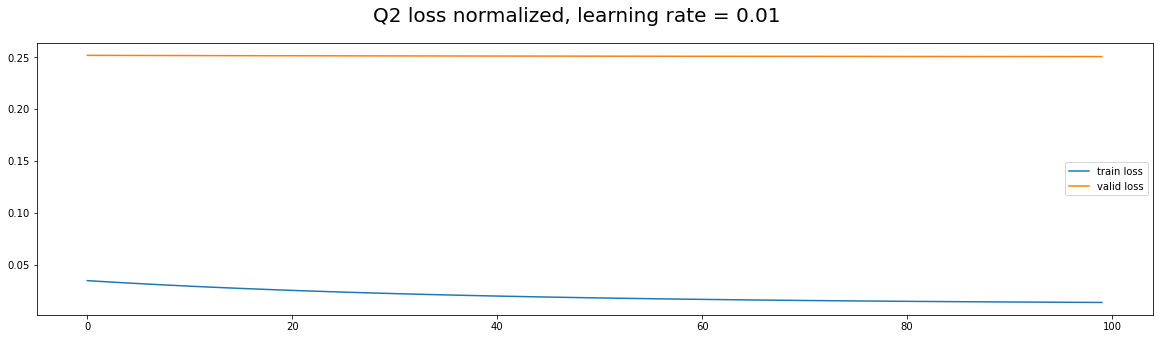

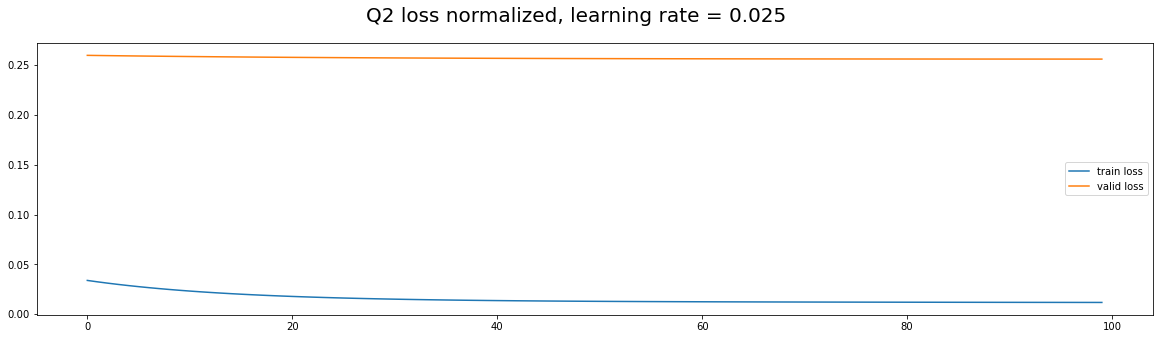

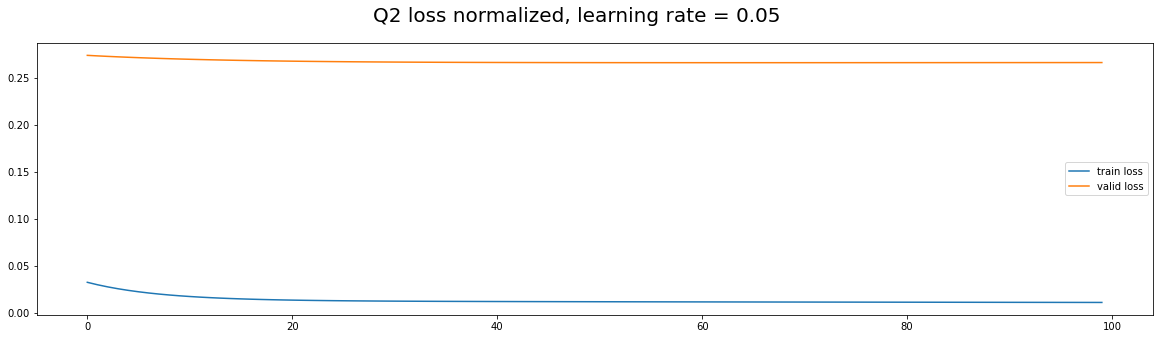

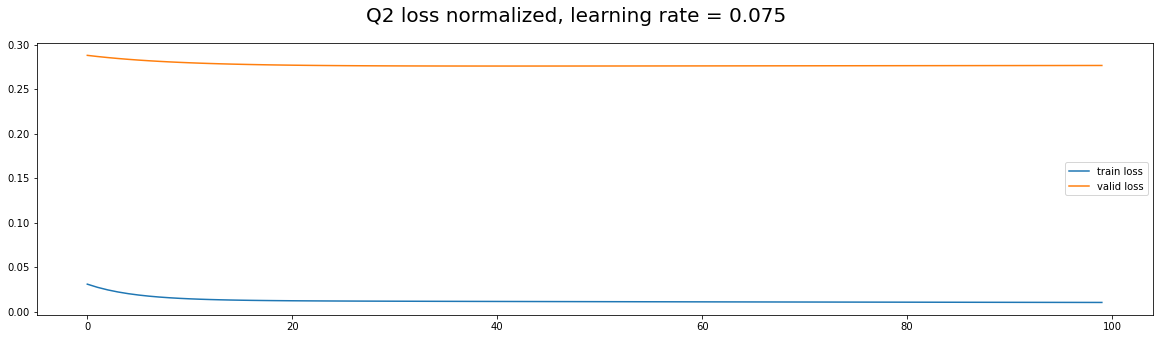

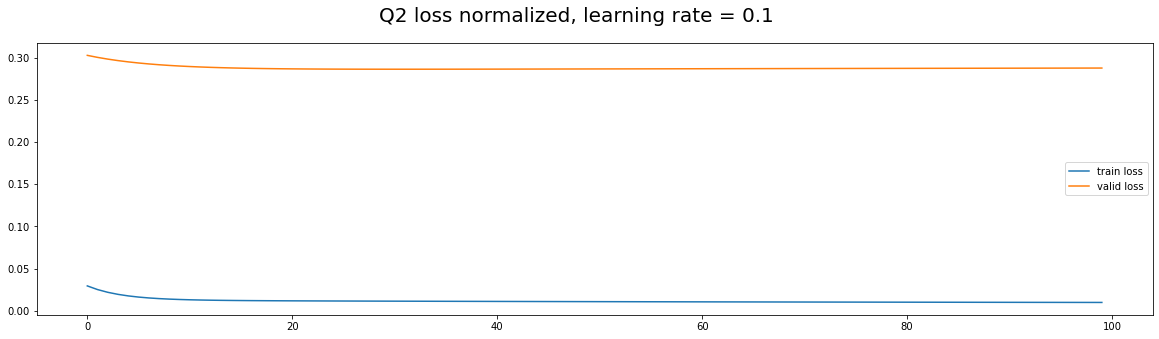

In [27]:
# plot normalized
iteration = np.arange(iterations)
for alpha in alpha_list:
    plt.figure(figsize = (20,5)).suptitle(f'Q2 loss normalized, learning rate = {alpha}',fontsize = 20)
    plt.plot(iteration,Q2a_cost_his_result_normalization[alpha],label = 'train loss')
    plt.plot(iteration,Q2a_valid_cost_his_result_normalization[alpha],label = 'valid loss')
    plt.legend()
    plt.show()

In [28]:
# standard
# learning rate alpha = [0.01,0.025,0.05,0.075,0.1]
iterations = 100;
alpha_list = [0.01,0.025,0.05,0.075,0.1]
Q2a_theta_result_standard = {}
Q2a_cost_his_result_standard = {}
Q2a_valid_cost_his_result_standard = {}
for alpha in alpha_list:
    theta = [0.,0.,0.,0.,0.,0.]
    theta, cost_hist,cost_valid_hist = gradient_descent(X_input_standard,
                                                        Y_standard,
                                                        X_input_valid_standard,
                                                        Y_standard_test,
                                                        theta,
                                                        alpha,
                                                        iterations,
                                                        train_size,
                                                        test_size)
    Q2a_theta_result_standard[alpha] = theta
    Q2a_cost_his_result_standard[alpha] = cost_hist
    Q2a_valid_cost_his_result_standard[alpha] = cost_valid_hist



In [29]:
# standarad
Q2a_theta_result_standard

{0.01: array([-1.16558848e-20,  2.44920314e-01,  1.21807744e-01,  2.26054366e-01,
         1.86892686e-01,  1.54176211e-01]),
 0.025: array([1.77970791e-17, 3.27745399e-01, 1.05462207e-01, 2.81883960e-01,
        2.43321869e-01, 1.80917595e-01]),
 0.05: array([1.44824368e-17, 3.48398455e-01, 8.12062896e-02, 2.94908648e-01,
        2.59711494e-01, 1.76958787e-01]),
 0.075: array([-4.76434290e-18,  3.50999491e-01,  7.58876067e-02,  2.97613888e-01,
         2.62388061e-01,  1.75381058e-01]),
 0.1: array([9.41212695e-18, 3.51397112e-01, 7.48310280e-02, 2.98247789e-01,
        2.62837037e-01, 1.75086141e-01])}

In [30]:
# standarad
Q2a_cost_his_result_standard

{0.01: array([0.49127561, 0.48410576, 0.47717008, 0.47046078, 0.46397034,
        0.45769149, 0.45161721, 0.44574071, 0.44005542, 0.434555  ,
        0.42923332, 0.42408446, 0.4191027 , 0.41428249, 0.40961849,
        0.40510552, 0.4007386 , 0.39651288, 0.39242371, 0.38846656,
        0.38463708, 0.38093105, 0.3773444 , 0.37387318, 0.37051359,
        0.36726195, 0.3641147 , 0.3610684 , 0.35811973, 0.35526547,
        0.35250252, 0.34982788, 0.34723864, 0.344732  , 0.34230525,
        0.33995576, 0.337681  , 0.33547852, 0.33334595, 0.331281  ,
        0.32928147, 0.32734519, 0.32547012, 0.32365425, 0.32189564,
        0.32019242, 0.3185428 , 0.31694502, 0.31539738, 0.31389827,
        0.3124461 , 0.31103933, 0.30967651, 0.30835619, 0.307077  ,
        0.30583761, 0.30463672, 0.30347309, 0.30234551, 0.30125281,
        0.30019387, 0.2991676 , 0.29817293, 0.29720886, 0.2962744 ,
        0.29536858, 0.2944905 , 0.29363926, 0.29281399, 0.29201386,
        0.29123807, 0.29048584, 0.28975641

In [31]:
# standarad
Q2a_valid_cost_his_result_standard

{0.01: array([0.4979312 , 0.49790211, 0.49787352, 0.49784541, 0.49781779,
        0.49779063, 0.49776394, 0.49773771, 0.49771192, 0.49768657,
        0.49766164, 0.49763715, 0.49761306, 0.49758939, 0.49756612,
        0.49754324, 0.49752074, 0.49749863, 0.49747689, 0.49745552,
        0.49743451, 0.49741385, 0.49739354, 0.49737357, 0.49735394,
        0.49733463, 0.49731565, 0.49729699, 0.49727865, 0.49726061,
        0.49724287, 0.49722543, 0.49720828, 0.49719142, 0.49717484,
        0.49715854, 0.49714251, 0.49712675, 0.49711125, 0.49709601,
        0.49708102, 0.49706628, 0.49705179, 0.49703754, 0.49702353,
        0.49700974, 0.49699619, 0.49698287, 0.49696976, 0.49695687,
        0.4969442 , 0.49693173, 0.49691947, 0.49690742, 0.49689556,
        0.4968839 , 0.49687244, 0.49686116, 0.49685007, 0.49683916,
        0.49682843, 0.49681788, 0.49680751, 0.4967973 , 0.49678727,
        0.49677739, 0.49676769, 0.49675814, 0.49674874, 0.49673951,
        0.49673042, 0.49672149, 0.4967127 

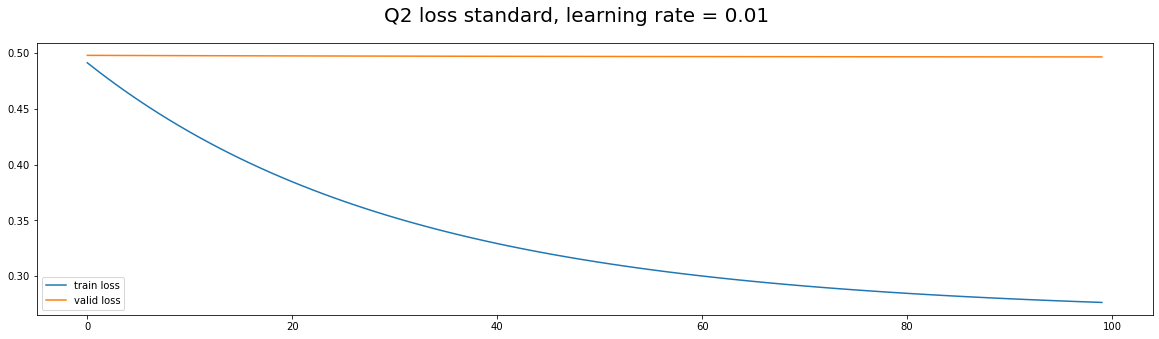

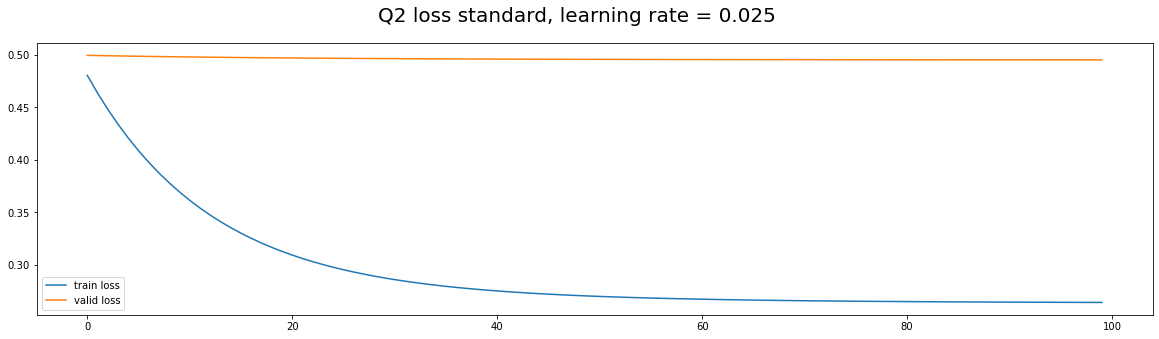

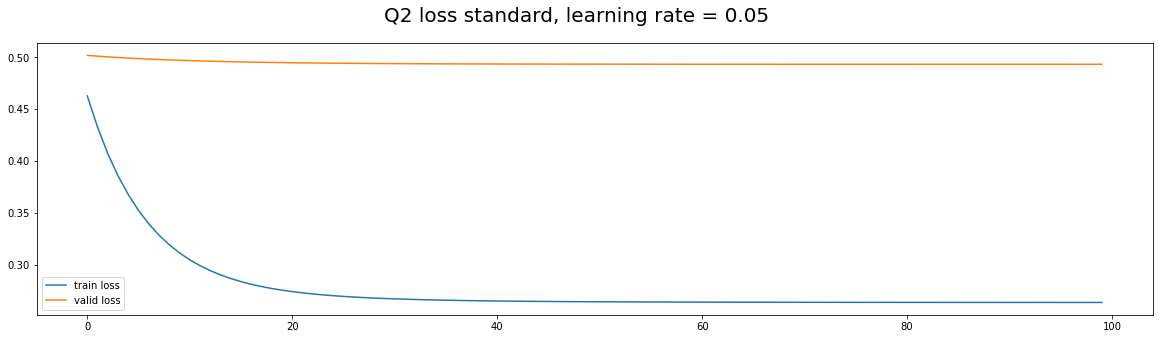

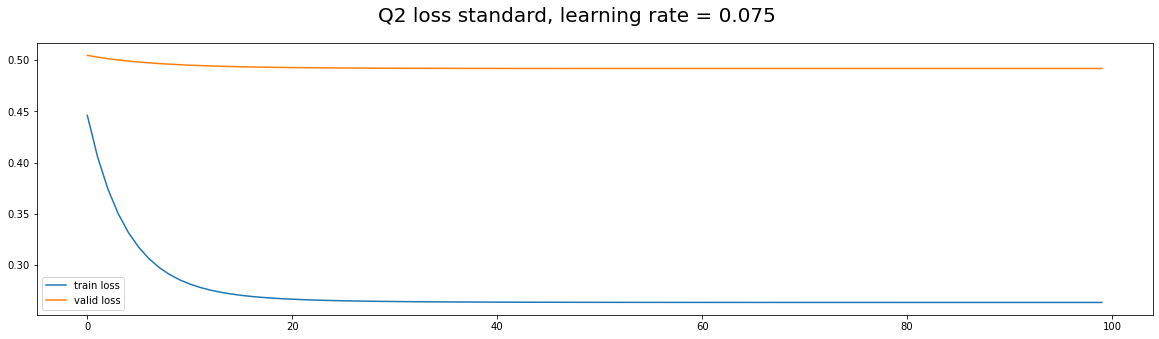

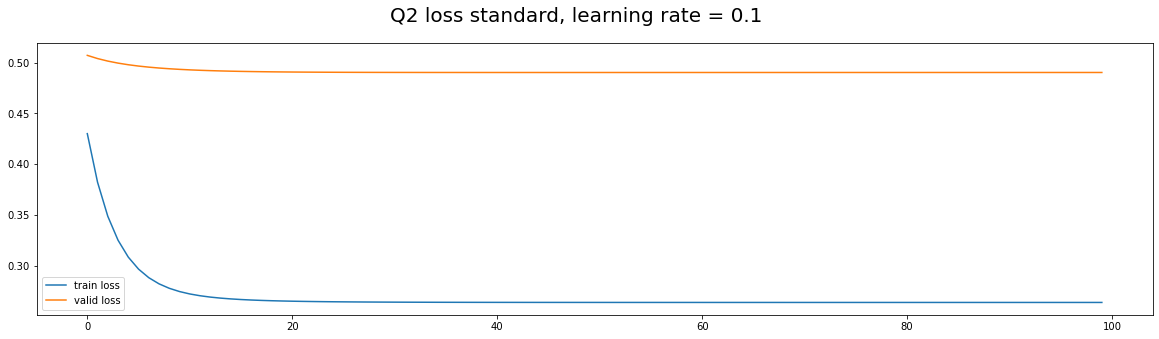

In [32]:
# plot standard
iteration = np.arange(iterations)
for alpha in alpha_list:
    plt.figure(figsize = (20,5)).suptitle(f'Q2 loss standard, learning rate = {alpha}',fontsize = 20)
    plt.plot(iteration,Q2a_cost_his_result_standard[alpha],label = 'train loss')
    plt.plot(iteration,Q2a_valid_cost_his_result_standard[alpha], label = 'valid loss')
    plt.legend()
    plt.show()

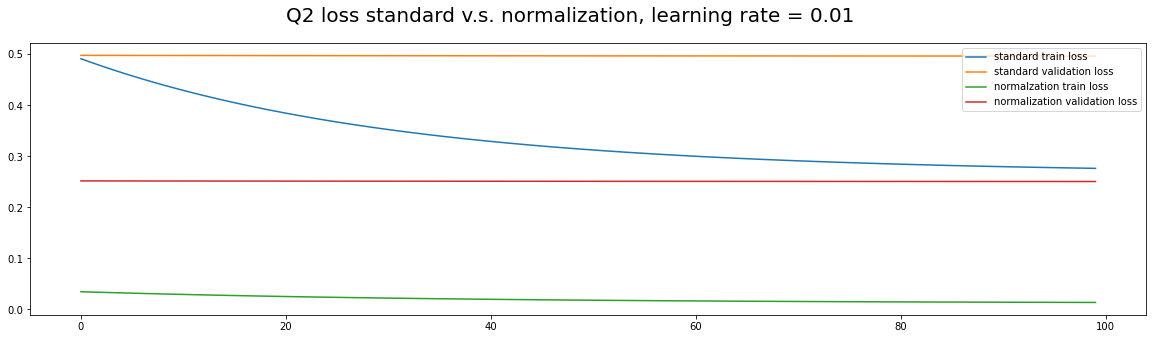

In [33]:
# based on the above result, learing rate = 0.01 is better
# then we comparae standard and normalized
plt.figure(figsize = (20,5)).suptitle(f'Q2 loss standard v.s. normalization, learning rate = 0.01',fontsize = 20)
plt.plot(iteration,Q2a_cost_his_result_standard[0.01],label = 'standard train loss')
plt.plot(iteration,Q2a_valid_cost_his_result_standard[0.01],label = 'standard validation loss')
plt.plot(iteration,Q2a_cost_his_result_normalization[0.01],label = 'normalzation train loss')
plt.plot(iteration,Q2a_valid_cost_his_result_normalization[0.01],label = 'normalization validation loss')
plt.legend()
plt.show()

## Q3.a

In [34]:
# add penalty, need to modify loss function

In [35]:
# Functions to compute cost and do gradient descent
def compute_cost(X,Y,theta,m,lamda):
    pred = X.dot(theta)
    errors = np.subtract(pred,Y)
    sqrErr = np.square(errors)
    J = 1 / (2 * m) * (np.sum(sqrErr)+lamda*(np.sum(theta)-theta[0]))
    return J

def gradient_descent_with_penalty(X,Y,X_test,Y_test,theta,alpha,iterations,train_size,test_size,lamda):
    cost_history = np.zeros(iterations)
    cost_history_valid = np.zeros(iterations)
    for i in range(iterations):
        pred = X.dot(theta)
        pred_valid = X_test.dot(theta)
        errors = np.subtract(pred,Y)
        errors_valid = np.subtract(pred_valid,Y_test)
        sum_delta = (alpha / train_size) * X.transpose().dot(errors)
        sum_delta_valid = (alpha / test_size) * X_test.transpose().dot(errors_valid)
        theta = theta - sum_delta
        cost_history[i] = compute_cost(X,Y,theta,train_size,lamda)
        cost_history_valid[i] = compute_cost(X_test,Y_test,sum_delta_valid,test_size,0)
    return theta, cost_history, cost_history_valid


In [36]:
# Q3. normalization
# learning rate alpha = [0.01,0.025,0.05,0.075,0.1]

iterations = 500;
alpha_list = [0.01,0.025,0.05,0.075,0.1]
theta_result_normalization_penalty = {}
cost_his_result_normalization_penalty = {}
validation_cost_his_result_normalization_penalty = {}
lamda = 0.5
for alpha in alpha_list:
    theta = [0.,0.,0.,0.,0.,0.]
    theta, cost_hist,valid_cost_his = gradient_descent_with_penalty(X_input_norm,
                                                                    Y_norm,
                                                                    X_input_valid_norm,
                                                                    Y_norm_test,
                                                                    theta,
                                                                    alpha,
                                                                    iterations,
                                                                    train_size,
                                                                    test_size,
                                                                    lamda)
    theta_result_normalization_penalty[alpha] = theta
    cost_his_result_normalization_penalty[alpha] = cost_hist
    validation_cost_his_result_normalization_penalty[alpha] = valid_cost_his

In [37]:
theta_result_normalization_penalty

{0.01: array([0.10837536, 0.07696094, 0.06089252, 0.06963304, 0.09489885,
        0.08219476]),
 0.025: array([0.06274511, 0.12303485, 0.07709698, 0.12287321, 0.12897354,
        0.11275098]),
 0.05: array([0.02106976, 0.18550557, 0.09021436, 0.180554  , 0.14948515,
        0.13114762]),
 0.075: array([3.39705990e-05, 2.33719460e-01, 9.45091433e-02, 2.15798029e-01,
        1.53169639e-01, 1.32397773e-01]),
 0.1: array([-0.01189468,  0.27103461,  0.09474628,  0.23835919,  0.15232553,
         0.1283671 ])}

In [38]:
cost_his_result_normalization_penalty

{0.01: array([0.03475452, 0.03415495, 0.03357153, 0.03300382, 0.03245139,
        0.03191384, 0.03139075, 0.03088174, 0.03038642, 0.02990443,
        0.0294354 , 0.02897898, 0.02853483, 0.02810261, 0.02768201,
        0.0272727 , 0.02687439, 0.02648678, 0.02610956, 0.02574247,
        0.02538523, 0.02503757, 0.02469924, 0.02436997, 0.02404952,
        0.02373766, 0.02343415, 0.02313876, 0.02285128, 0.0225715 ,
        0.02229919, 0.02203416, 0.02177622, 0.02152516, 0.02128081,
        0.02104299, 0.0208115 , 0.02058619, 0.02036689, 0.02015343,
        0.01994566, 0.01974341, 0.01954655, 0.01935493, 0.01916839,
        0.01898681, 0.01881006, 0.01863799, 0.01847049, 0.01830742,
        0.01814868, 0.01799414, 0.01784369, 0.01769721, 0.01755461,
        0.01741577, 0.01728059, 0.01714898, 0.01702083, 0.01689606,
        0.01677457, 0.01665628, 0.01654109, 0.01642892, 0.01631969,
        0.01621333, 0.01610975, 0.01600887, 0.01591063, 0.01581496,
        0.01572178, 0.01563102, 0.01554262

In [39]:
validation_cost_his_result_normalization_penalty

{0.01: array([0.25189176, 0.25187009, 0.25184873, 0.25182766, 0.25180688,
        0.25178639, 0.25176618, 0.25174626, 0.25172661, 0.25170724,
        0.25168813, 0.25166929, 0.25165072, 0.2516324 , 0.25161433,
        0.25159652, 0.25157896, 0.25156164, 0.25154456, 0.25152771,
        0.25151111, 0.25149473, 0.25147858, 0.25146266, 0.25144696,
        0.25143148, 0.25141621, 0.25140116, 0.25138632, 0.25137168,
        0.25135725, 0.25134302, 0.25132899, 0.25131515, 0.25130151,
        0.25128806, 0.25127479, 0.25126171, 0.25124882, 0.2512361 ,
        0.25122357, 0.2512112 , 0.25119901, 0.251187  , 0.25117515,
        0.25116346, 0.25115194, 0.25114059, 0.25112939, 0.25111834,
        0.25110746, 0.25109672, 0.25108614, 0.25107571, 0.25106542,
        0.25105527, 0.25104527, 0.25103541, 0.25102569, 0.25101611,
        0.25100666, 0.25099734, 0.25098816, 0.2509791 , 0.25097018,
        0.25096137, 0.2509527 , 0.25094414, 0.25093571, 0.25092739,
        0.2509192 , 0.25091112, 0.25090315

In [40]:
# Q3. standard
# learning rate alpha = [0.01,0.025,0.05,0.075,0.1]

iterations = 500;
alpha_list = [0.01,0.025,0.05,0.075,0.1]
theta_result_standard_penalty = {}
cost_his_result_standard_penalty = {}
validation_cost_his_result_standard_penalty = {}
lamda = 0.5
for alpha in alpha_list:
    theta = [0.,0.,0.,0.,0.,0.]
    theta, cost_hist,valid_cost_his = gradient_descent_with_penalty(X_input_standard,
                                                                    Y_standard,
                                                                    X_input_valid_standard,
                                                                    Y_standard_test,
                                                                    theta,
                                                                    alpha,
                                                                    iterations,
                                                                    train_size,
                                                                    test_size,
                                                                    lamda)
    theta_result_standard_penalty[alpha] = theta
    cost_his_result_standard_penalty[alpha] = cost_hist
    validation_cost_his_result_standard_penalty[alpha] = valid_cost_his

In [41]:
theta_result_standard_penalty

{0.01: array([-3.54047500e-18,  3.48212230e-01,  8.14735023e-02,  2.94792072e-01,
         2.59551612e-01,  1.77025140e-01]),
 0.025: array([-5.84251224e-18,  3.51454781e-01,  7.46386013e-02,  2.98378028e-01,
         2.62905300e-01,  1.75039391e-01]),
 0.05: array([-6.27960792e-18,  3.51470146e-01,  7.45758993e-02,  2.98423850e-01,
         2.62924337e-01,  1.75026088e-01]),
 0.075: array([2.79304139e-17, 3.51470148e-01, 7.45758744e-02, 2.98423872e-01,
        2.62924342e-01, 1.75026085e-01]),
 0.1: array([-3.43848601e-17,  3.51470148e-01,  7.45758744e-02,  2.98423872e-01,
         2.62924342e-01,  1.75026085e-01])}

In [42]:
cost_his_result_standard_penalty

{0.01: array([0.49128813, 0.4841306 , 0.47720703, 0.47050963, 0.4640309 ,
        0.45776356, 0.4517006 , 0.44583523, 0.44016088, 0.43467123,
        0.42936014, 0.42422169, 0.41925015, 0.41444001, 0.4097859 ,
        0.40528267, 0.40092531, 0.39670901, 0.39262909, 0.38868104,
        0.38486051, 0.38116328, 0.37758528, 0.37412257, 0.37077134,
        0.36752793, 0.36438877, 0.36135043, 0.35840958, 0.35556302,
        0.35280764, 0.35014044, 0.34755852, 0.34505907, 0.3426394 ,
        0.34029687, 0.33802895, 0.3358332 , 0.33370725, 0.33164881,
        0.32965567, 0.3277257 , 0.32585682, 0.32404703, 0.32229441,
        0.32059708, 0.31895325, 0.31736116, 0.31581913, 0.31432552,
        0.31287877, 0.31147733, 0.31011975, 0.30880458, 0.30753046,
        0.30629605, 0.30510006, 0.30394125, 0.30281841, 0.30173038,
        0.30067602, 0.29965426, 0.29866403, 0.29770433, 0.29677415,
        0.29587256, 0.29499863, 0.29415146, 0.29333021, 0.29253403,
        0.29176213, 0.29101371, 0.29028804

In [43]:
validation_cost_his_result_standard_penalty

{0.01: array([0.4979312 , 0.49790211, 0.49787352, 0.49784541, 0.49781779,
        0.49779063, 0.49776394, 0.49773771, 0.49771192, 0.49768657,
        0.49766164, 0.49763715, 0.49761306, 0.49758939, 0.49756612,
        0.49754324, 0.49752074, 0.49749863, 0.49747689, 0.49745552,
        0.49743451, 0.49741385, 0.49739354, 0.49737357, 0.49735394,
        0.49733463, 0.49731565, 0.49729699, 0.49727865, 0.49726061,
        0.49724287, 0.49722543, 0.49720828, 0.49719142, 0.49717484,
        0.49715854, 0.49714251, 0.49712675, 0.49711125, 0.49709601,
        0.49708102, 0.49706628, 0.49705179, 0.49703754, 0.49702353,
        0.49700974, 0.49699619, 0.49698287, 0.49696976, 0.49695687,
        0.4969442 , 0.49693173, 0.49691947, 0.49690742, 0.49689556,
        0.4968839 , 0.49687244, 0.49686116, 0.49685007, 0.49683916,
        0.49682843, 0.49681788, 0.49680751, 0.4967973 , 0.49678727,
        0.49677739, 0.49676769, 0.49675814, 0.49674874, 0.49673951,
        0.49673042, 0.49672149, 0.4967127 

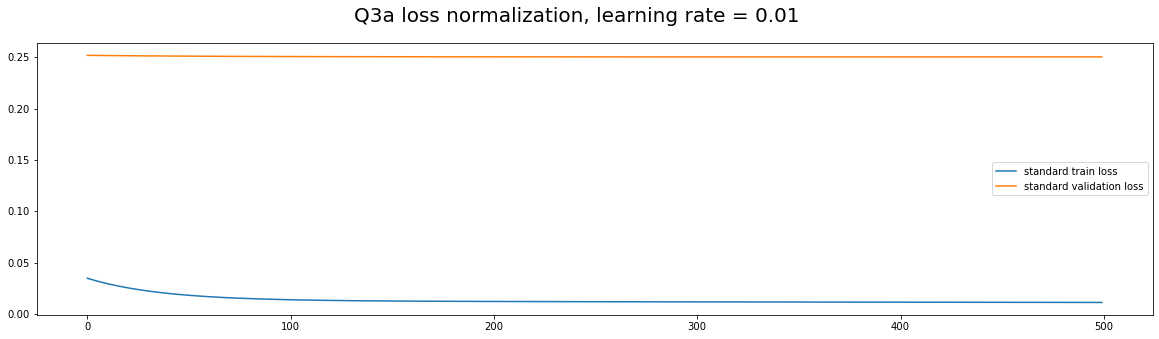

In [44]:
# plot
# based on the above result, learing rate = 0.01 is better
# normalized
iteration = np.arange(iterations)
plt.figure(figsize = (20,5)).suptitle(f'Q3a loss normalization, learning rate = 0.01',fontsize = 20)
plt.plot(iteration,cost_his_result_normalization_penalty[0.01],label = 'standard train loss')
plt.plot(iteration,validation_cost_his_result_normalization_penalty[0.01],label = 'standard validation loss')
plt.legend()
plt.show()


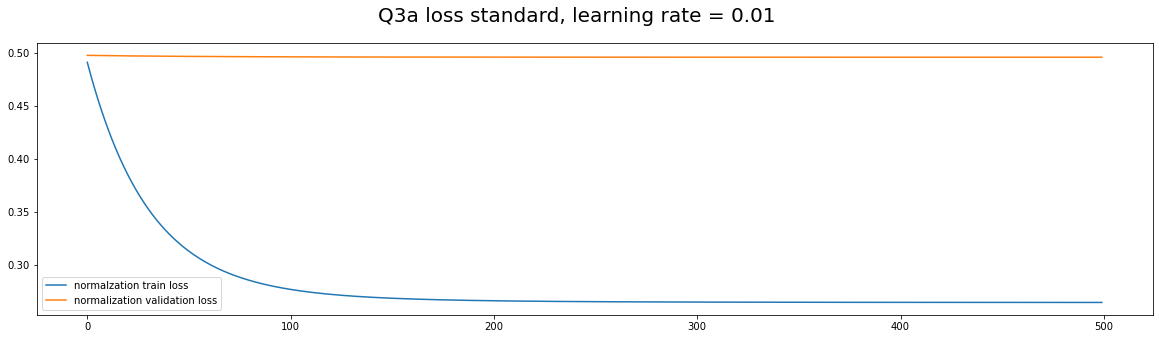

In [45]:
# plot
# based on the above result, learing rate = 0.01 is better
# standard a
plt.figure(figsize = (20,5)).suptitle(f'Q3a loss standard, learning rate = 0.01',fontsize = 20)
plt.plot(iteration,cost_his_result_standard_penalty[0.01],label = 'normalzation train loss')
plt.plot(iteration,validation_cost_his_result_standard_penalty[0.01],label = 'normalization validation loss')
plt.legend()
plt.show()

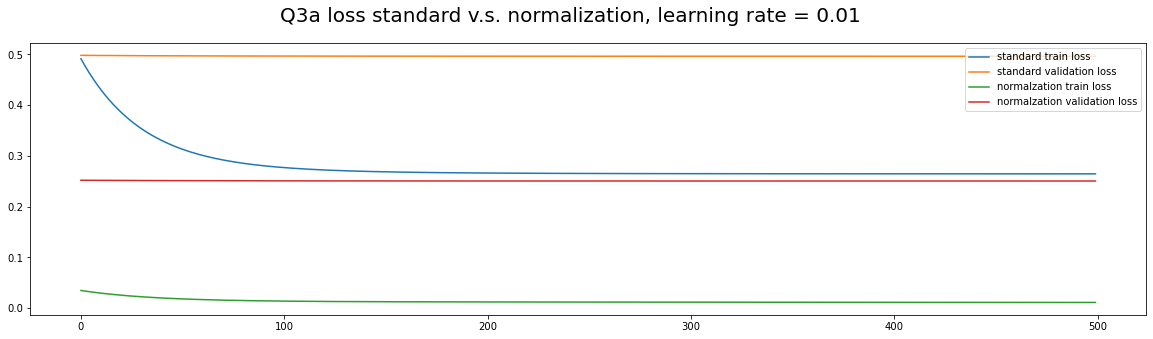

In [46]:
# plot
# based on the above result, learing rate = 0.01 is better
plt.figure(figsize = (20,5)).suptitle(f'Q3a loss standard v.s. normalization, learning rate = 0.01',fontsize = 20)
plt.plot(iteration,cost_his_result_standard_penalty[0.01],label = 'standard train loss')
plt.plot(iteration,validation_cost_his_result_standard_penalty[0.01],label = 'standard validation loss')
plt.plot(iteration,cost_his_result_normalization_penalty[0.01],label = 'normalzation train loss')
plt.plot(iteration,validation_cost_his_result_normalization_penalty[0.01],label = 'normalzation validation loss')
plt.legend()
plt.show()

## Q1.b

In [47]:
data = pd.read_csv('housing.csv')

In [48]:
column_needed = ['area',
               'bedrooms',
               'bathrooms',
               'stories',
               'mainroad',
               'guestroom',
               'basement',
               'hotwaterheating',
                'airconditioning',
                 'parking',
                 'prefarea',
                 'price']

In [49]:
train_data = data[column_needed][0:int(len(data)*0.7)]

In [50]:
test_data = data[column_needed][int(len(data)*0.7):]

In [51]:
onehot_col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in onehot_col:
    train_data[col] = train_data[col].apply(lambda x: 1 if (x == 'yes') else 0)
    test_data[col] = test_data[col].apply(lambda x: 1 if (x == 'yes') else 0)

In [52]:
# Question 1b
# Set up all the columns for training
X_1 = train_data['area'].values
X_2 = train_data['bedrooms'].values
X_3 = train_data['bathrooms'].values
X_4 = train_data['stories'].values
X_5 = train_data['mainroad'].values
X_6 = train_data['guestroom'].values
X_7 = train_data['basement'].values
X_8 = train_data['hotwaterheating'].values
X_9 = train_data['airconditioning'].values
X_10 = train_data['parking'].values
X_11 = train_data['prefarea'].values
Y = train_data['price'].values
train_size = len(Y)
X_0 = np.ones((train_size,1))


In [53]:
# Question 1b
# Set up all the columns for testing
X_1_test = test_data['area'].values
X_2_test = test_data['bedrooms'].values
X_3_test = test_data['bathrooms'].values
X_4_test = test_data['stories'].values
X_5_test = test_data['mainroad'].values
X_6_test = test_data['guestroom'].values
X_7_test = test_data['basement'].values
X_8_test = test_data['hotwaterheating'].values
X_9_test = test_data['airconditioning'].values
X_10_test = test_data['parking'].values
X_11_test = test_data['prefarea'].values
Y_test = test_data['price'].values
test_size = len(Y_test)
X_0_test = np.ones((test_size,1))


In [54]:
# Functions to compute cost and do gradient descent
def compute_cost(X,Y,theta,m):
    pred = X.dot(theta)
    errors = np.subtract(pred,Y)
    sqrErr = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErr)
    return J

def gradient_descent(X,Y,X_test,Y_test,theta,alpha,iterations,train_size,test_size):
    cost_history = np.zeros(iterations)
    cost_history_valid = np.zeros(iterations)
    for i in range(iterations):
        pred = X.dot(theta)
        pred_valid = X_test.dot(theta)
        errors = np.subtract(pred,Y)
        errors_valid = np.subtract(pred_valid,Y_test)
        sum_delta = (alpha / train_size) * X.transpose().dot(errors)
        sum_delta_valid = (alpha / test_size) * X_test.transpose().dot(errors_valid)
        theta = theta - sum_delta
        cost_history[i] = compute_cost(X,Y,theta,train_size)
        cost_history_valid[i] = compute_cost(X_test,Y_test,sum_delta_valid,test_size)
    return theta, cost_history, cost_history_valid

In [55]:
# X1
X_1 = X_1.reshape(train_size,1)
X_1_test = X_1_test.reshape(test_size,1)
# X2
X_2 = X_2.reshape(train_size,1)
X_2_test = X_2_test.reshape(test_size,1)
# X3
X_3 = X_3.reshape(train_size,1)
X_3_test = X_3_test.reshape(test_size,1)
# X4
X_4 = X_4.reshape(train_size,1)
X_4_test = X_4_test.reshape(test_size,1)
# X5
X_5 = X_5.reshape(train_size,1)
X_5_test = X_5_test.reshape(test_size,1)
# X6
X_6 = X_6.reshape(train_size,1)
X_6_test = X_6_test.reshape(test_size,1)
# X7
X_7 = X_7.reshape(train_size,1)
X_7_test = X_7_test.reshape(test_size,1)
# X8
X_8 = X_8.reshape(train_size,1)
X_8_test = X_8_test.reshape(test_size,1)
# X9
X_9 = X_9.reshape(train_size,1)
X_9_test = X_9_test.reshape(test_size,1)
# X10
X_10 = X_10.reshape(train_size,1)
X_10_test = X_10_test.reshape(test_size,1)
# X11
X_11 = X_11.reshape(train_size,1)
X_11_test = X_11_test.reshape(test_size,1)


In [56]:
# Set X input as combination of X0~X_11
X_input  = np.hstack((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11))

# Set X_valid input as combination of X0_test ~ X_5_test
X_input_validation = np.hstack((X_0_test,
                                X_1_test,
                                X_2_test,
                                X_3_test,
                                X_4_test,
                                X_5_test,
                                X_6_test,
                                X_7_test,
                                X_8_test,
                                X_9_test,
                                X_10_test,
                                X_11_test))

In [57]:
# training
iterations = 100;
alpha_list = [0.01,0.025,0.05,0.075,0.1]
Q1b_theta = {}
Q1b_cost_train = {}
Q1b_cost_valid = {}
for alpha in alpha_list:
    theta = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
    theta, cost_hist,cost_valid_hist = gradient_descent(X_input,Y,X_input_validation,Y_test,theta,alpha,iterations,train_size,test_size)
    Q1b_theta[alpha] = theta
    Q1b_cost_train[alpha] = cost_hist
    Q1b_cost_valid[alpha] = cost_valid_hist

<ipython-input-54-e9cb99871cb3>:5: RuntimeWarning: overflow encountered in square
  sqrErr = np.square(errors)
<ipython-input-54-e9cb99871cb3>:19: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta


In [58]:
Q1b_theta

{0.01: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 0.025: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 0.05: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 0.075: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 0.1: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}

In [59]:
Q1b_cost_train

{0.01: array([2.03617857e+024, 2.79484987e+035, 3.83619880e+046, 5.26554982e+057,
        7.22747083e+068, 9.92039510e+079, 1.36166913e+091, 1.86902113e+102,
        2.56541030e+113, 3.52127104e+124, 4.83328135e+135, 6.63414100e+146,
        9.10599315e+157, 1.24988467e+169, 1.71558627e+180, 2.35480627e+191,
        3.23219687e+202, 4.43649939e+213, 6.08951981e+224, 8.35844846e+235,
        1.14727701e+247, 1.57474744e+258, 2.16149151e+269, 2.96685386e+280,
        4.07229073e+291, 5.58960859e+302,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
      

In [60]:
Q1b_cost_valid

{0.01: array([1.22916514e+023, 3.05219413e+034, 4.18942256e+045, 5.75038322e+056,
        7.89295106e+067, 1.08338304e+079, 1.48704685e+090, 2.04111406e+101,
        2.80162430e+112, 3.84549735e+123, 5.27831298e+134, 7.24498949e+145,
        9.94444113e+156, 1.36496967e+168, 1.87355145e+179, 2.57162859e+190,
        3.52980624e+201, 4.84499673e+212, 6.65022149e+223, 9.12806515e+234,
        1.25291426e+246, 1.71974468e+257, 2.36051408e+268, 3.24003138e+279,
        4.44725302e+290, 6.10428019e+301,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
                    inf,             inf,             inf,             inf,
      

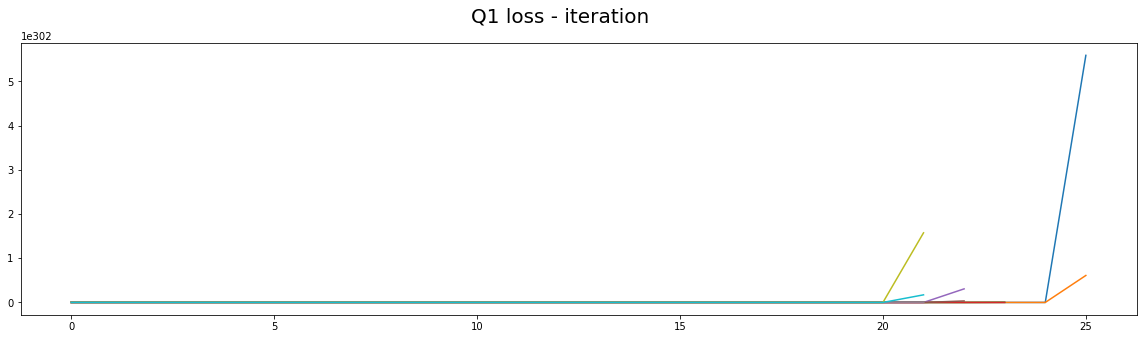

In [61]:
# plot
iteration = np.arange(iterations)
plt.figure(figsize = (20,5)).suptitle('Q1 loss - iteration',fontsize = 20)
for alpha in alpha_list:
    plt.plot(iteration,Q1_cost_train[alpha])
    plt.plot(iteration,Q1_cost_valid[alpha])
plt.show()

## Q2.b

In [62]:
# normalized_train_df
normalized_train_df = (train_data-train_data.min())/(train_data.max()-train_data.min())
normalized_test_df = (test_data-test_data.min())/(test_data.max()-test_data.min())

In [63]:
# standarization_train_df
standarization_train_df =(train_data-train_data.mean())/train_data.std()
standarization_test_df =(test_data-test_data.mean())/test_data.std()

In [64]:
# Question 2.b - normalized
# Set up all the columns for training
X_1_norm = normalized_train_df['area'].values
X_2_norm = normalized_train_df['bedrooms'].values
X_3_norm = normalized_train_df['bathrooms'].values
X_4_norm = normalized_train_df['stories'].values
X_5_norm = normalized_train_df['mainroad'].values
X_6_norm = normalized_train_df['guestroom'].values
X_7_norm = normalized_train_df['basement'].values
X_8_norm = normalized_train_df['hotwaterheating'].values
X_9_norm = normalized_train_df['airconditioning'].values
X_10_norm = normalized_train_df['parking'].values
X_11_norm = normalized_train_df['prefarea'].values
Y_norm = normalized_train_df['price'].values
train_size = len(Y_norm)
X_0 = np.ones((train_size,1))
# Set up all the columns for testing
X_1_norm_test = normalized_test_df['area'].values
X_2_norm_test = normalized_test_df['bedrooms'].values
X_3_norm_test = normalized_test_df['bathrooms'].values
X_4_norm_test = normalized_test_df['stories'].values
X_5_norm_test = normalized_test_df['mainroad'].values
X_6_norm_test = normalized_test_df['guestroom'].values
X_7_norm_test = normalized_test_df['basement'].values
X_8_norm_test = normalized_test_df['hotwaterheating'].values
X_9_norm_test = normalized_test_df['airconditioning'].values
X_10_norm_test = normalized_test_df['parking'].values
X_11_norm_test = normalized_test_df['prefarea'].values
Y_norm_test = normalized_test_df['price'].values
test_size = len(Y_norm_test)
X_0_test = np.ones((test_size,1))

In [65]:
# X1
X_1_norm = X_1_norm.reshape(train_size,1)
X_1_norm_test = X_1_norm_test.reshape(test_size,1)
# X2
X_2_norm = X_2_norm.reshape(train_size,1)
X_2_norm_test = X_2_norm_test.reshape(test_size,1)
# X3
X_3_norm = X_3_norm.reshape(train_size,1)
X_3_norm_test = X_3_norm_test.reshape(test_size,1)
# X4
X_4_norm = X_4_norm.reshape(train_size,1)
X_4_norm_test = X_4_norm_test.reshape(test_size,1)
# X5
X_5_norm = X_5_norm.reshape(train_size,1)
X_5_norm_test = X_5_norm_test.reshape(test_size,1)
# X6
X_6_norm = X_6_norm.reshape(train_size,1)
X_6_norm_test = X_6_norm_test.reshape(test_size,1)
# X7
X_7_norm = X_7_norm.reshape(train_size,1)
X_7_norm_test = X_7_norm_test.reshape(test_size,1)
# X8
X_8_norm = X_8_norm.reshape(train_size,1)
X_8_norm_test = X_8_norm_test.reshape(test_size,1)
# X9
X_9_norm = X_9_norm.reshape(train_size,1)
X_9_norm_test = X_9_norm_test.reshape(test_size,1)
# X10
X_10_norm = X_10_norm.reshape(train_size,1)
X_10_norm_test = X_10_norm_test.reshape(test_size,1)
# X11
X_11_norm = X_11_norm.reshape(train_size,1)
X_11_norm_test = X_11_norm_test.reshape(test_size,1)


In [66]:
# Question 2.b - standard
# Set up all the columns for training
X_1_standard = standarization_train_df['area'].values
X_2_standard = standarization_train_df['bedrooms'].values
X_3_standard = standarization_train_df['bathrooms'].values
X_4_standard = standarization_train_df['stories'].values
X_5_standard = standarization_train_df['mainroad'].values
X_6_standard = standarization_train_df['guestroom'].values
X_7_standard = standarization_train_df['basement'].values
X_8_standard = standarization_train_df['hotwaterheating'].values
X_9_standard = standarization_train_df['airconditioning'].values
X_10_standard = standarization_train_df['parking'].values
X_11_standard = standarization_train_df['prefarea'].values
Y_standard = standarization_train_df['price'].values
train_size   = len(Y_standard)
X_0_standard = np.ones((train_size,1))
# Set up all the columns for testing
X_1_standard_test = standarization_test_df['area'].values
X_2_standard_test = standarization_test_df['bedrooms'].values
X_3_standard_test = standarization_test_df['bathrooms'].values
X_4_standard_test = standarization_test_df['stories'].values
X_5_standard_test = standarization_test_df['mainroad'].values
X_6_standard_test = standarization_test_df['guestroom'].values
X_7_standard_test = standarization_test_df['basement'].values
X_8_standard_test = standarization_test_df['hotwaterheating'].values
X_9_standard_test = standarization_test_df['airconditioning'].values
X_10_standard_test = standarization_test_df['parking'].values
X_11_standard_test = standarization_test_df['prefarea'].values
Y_standard_test = standarization_test_df['price'].values
test_size   = len(Y_standard_test)
X_0_standard_test = np.ones((test_size,1))

In [67]:
# X1
X_1_standard = X_1_standard.reshape(train_size,1)
X_1_standard_test = X_1_standard_test.reshape(test_size,1)
# X2
X_2_standard = X_2_standard.reshape(train_size,1)
X_2_standard_test = X_2_standard_test.reshape(test_size,1)
# X3
X_3_standard = X_3_standard.reshape(train_size,1)
X_3_standard_test = X_3_standard_test.reshape(test_size,1)
# X4
X_4_standard = X_4_standard.reshape(train_size,1)
X_4_standard_test = X_4_standard_test.reshape(test_size,1)
# X5
X_5_standard = X_5_standard.reshape(train_size,1)
X_5_standard_test = X_5_standard_test.reshape(test_size,1)
# X6
X_6_standard = X_6_standard.reshape(train_size,1)
X_6_standard_test = X_6_standard_test.reshape(test_size,1)
# X7
X_7_standard = X_7_standard.reshape(train_size,1)
X_7_standard_test = X_7_standard_test.reshape(test_size,1)
# X8
X_8_standard = X_8_standard.reshape(train_size,1)
X_8_standard_test = X_8_standard_test.reshape(test_size,1)
# X9
X_9_standard = X_9_standard.reshape(train_size,1)
X_9_standard_test = X_9_standard_test.reshape(test_size,1)
# X10
X_10_standard = X_10_standard.reshape(train_size,1)
X_10_standard_test = X_10_standard_test.reshape(test_size,1)
# X11
X_11_standard = X_11_standard.reshape(train_size,1)
X_11_standard_test = X_11_standard_test.reshape(test_size,1)

In [68]:
# normalization input
X_input_norm  = np.hstack((X_0,
                           X_1_norm,
                           X_2_norm,
                           X_3_norm,
                           X_4_norm,
                           X_5_norm,
                           X_6_norm,
                           X_7_norm,
                           X_8_norm,
                           X_9_norm,
                           X_10_norm,
                           X_11_norm))

X_input_valid_norm = np.hstack((X_0_test,
                                X_1_norm_test,
                                X_2_norm_test,
                                X_3_norm_test,
                                X_4_norm_test, 
                                X_5_norm_test,
                                X_6_norm_test,
                                X_7_norm_test,
                                X_8_norm_test,
                                X_9_norm_test,
                                X_10_norm_test,
                                X_11_norm_test,))

In [69]:
# standard input
X_input_standard  = np.hstack((X_0,
                               X_1_standard,
                               X_2_standard,
                               X_3_standard,
                               X_4_standard,
                               X_5_standard,
                               X_6_standard,
                               X_7_standard,
                               X_8_standard,
                               X_9_standard,
                               X_10_standard,
                               X_11_standard))
X_input_valid_standard  = np.hstack((X_0_test,
                               X_1_standard_test,
                               X_2_standard_test,
                               X_3_standard_test,
                               X_4_standard_test,
                               X_5_standard_test,
                               X_6_standard_test,
                               X_7_standard_test,
                               X_8_standard_test,
                               X_9_standard_test,
                               X_10_standard_test,
                               X_11_standard_test))

In [70]:
# normalization
# learning rate alpha = [0.01,0.025,0.05,0.075,0.1]

iterations = 100;
alpha_list = [0.01,0.025,0.05,0.075,0.1]
Q2b_theta_result_normalization = {}
Q2b_cost_his_result_normalization = {}
Q2b_valid_cost_his_result_normalization = {}
for alpha in alpha_list:
    theta = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
    theta, cost_hist,cost_valid_hist = gradient_descent(X_input_norm,
                                                        Y_norm,
                                                        X_input_valid_norm,
                                                        Y_norm_test,
                                                        theta,
                                                        alpha,
                                                        iterations,
                                                        train_size,
                                                        test_size)
    Q2b_theta_result_normalization[alpha] = theta
    Q2b_cost_his_result_normalization[alpha] = cost_hist
    Q2b_valid_cost_his_result_normalization[alpha] = cost_valid_hist

In [71]:
Q2b_theta_result_normalization

{0.01: array([0.06026929, 0.02616389, 0.02493753, 0.02119931, 0.03622779,
        0.06115741, 0.02044776, 0.0249082 , 0.00655647, 0.0466545 ,
        0.03051553, 0.03041083]),
 0.025: array([0.05029842, 0.03690009, 0.03305069, 0.03779792, 0.05354473,
        0.05715453, 0.02352057, 0.01907035, 0.01119839, 0.06303495,
        0.04435861, 0.03924783]),
 0.05: array([0.03014518, 0.05181587, 0.04285318, 0.06156066, 0.07364721,
        0.04706478, 0.02675002, 0.0130404 , 0.01873542, 0.07640492,
        0.06180203, 0.04873276]),
 0.075: array([0.01340794, 0.06565821, 0.05089745, 0.08230228, 0.08837083,
        0.04020923, 0.0293426 , 0.01152561, 0.025977  , 0.08222394,
        0.07566848, 0.05532609]),
 0.1: array([-0.00076627,  0.07859095,  0.0575272 ,  0.10056234,  0.09952714,
         0.03574745,  0.03113945,  0.01203171,  0.03262374,  0.08424925,
         0.08666179,  0.05976339])}

In [72]:
Q2b_cost_his_result_normalization

{0.01: array([0.03408002, 0.03286016, 0.03170719, 0.03061741, 0.02958733,
        0.02861366, 0.02769328, 0.02682324, 0.02600076, 0.02522321,
        0.02448812, 0.02379314, 0.02313604, 0.02251475, 0.02192727,
        0.02137175, 0.02084642, 0.02034961, 0.01987974, 0.01943533,
        0.01901497, 0.01861734, 0.01824118, 0.0178853 , 0.01754858,
        0.01722997, 0.01692847, 0.01664313, 0.01637306, 0.01611742,
        0.01587541, 0.01564629, 0.01542933, 0.01522387, 0.01502927,
        0.01484494, 0.01467031, 0.01450485, 0.01434804, 0.01419942,
        0.01405852, 0.01392494, 0.01379825, 0.01367809, 0.01356409,
        0.01345592, 0.01335325, 0.01325579, 0.01316324, 0.01307533,
        0.01299181, 0.01291244, 0.01283699, 0.01276525, 0.01269701,
        0.01263208, 0.01257027, 0.01251142, 0.01245537, 0.01240196,
        0.01235104, 0.01230249, 0.01225617, 0.01221195, 0.01216973,
        0.01212939, 0.01209084, 0.01205397, 0.01201869, 0.01198492,
        0.01195258, 0.01192158, 0.01189185

In [73]:
Q2b_valid_cost_his_result_normalization

{0.01: array([0.25443392, 0.25437938, 0.25432639, 0.25427492, 0.25422493,
        0.25417637, 0.2541292 , 0.25408339, 0.25403889, 0.25399567,
        0.25395369, 0.25391292, 0.25387332, 0.25383486, 0.25379751,
        0.25376123, 0.253726  , 0.25369179, 0.25365856, 0.2536263 ,
        0.25359496, 0.25356453, 0.25353499, 0.2535063 , 0.25347844,
        0.25345139, 0.25342512, 0.25339962, 0.25337486, 0.25335083,
        0.25332749, 0.25330483, 0.25328284, 0.25326148, 0.25324076,
        0.25322064, 0.25320111, 0.25318215, 0.25316375, 0.2531459 ,
        0.25312857, 0.25311175, 0.25309542, 0.25307959, 0.25306422,
        0.2530493 , 0.25303484, 0.2530208 , 0.25300718, 0.25299397,
        0.25298115, 0.25296872, 0.25295666, 0.25294496, 0.25293362,
        0.25292262, 0.25291195, 0.25290161, 0.25289158, 0.25288186,
        0.25287243, 0.2528633 , 0.25285444, 0.25284586, 0.25283754,
        0.25282948, 0.25282167, 0.25281411, 0.25280678, 0.25279968,
        0.2527928 , 0.25278614, 0.25277969

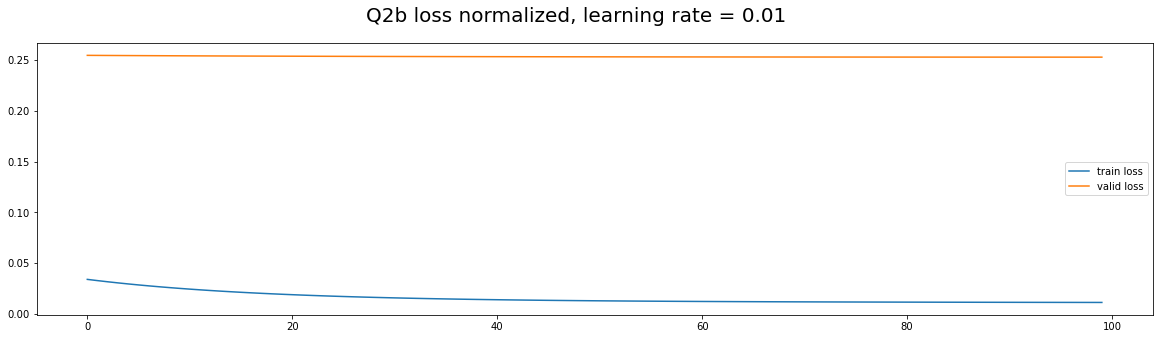

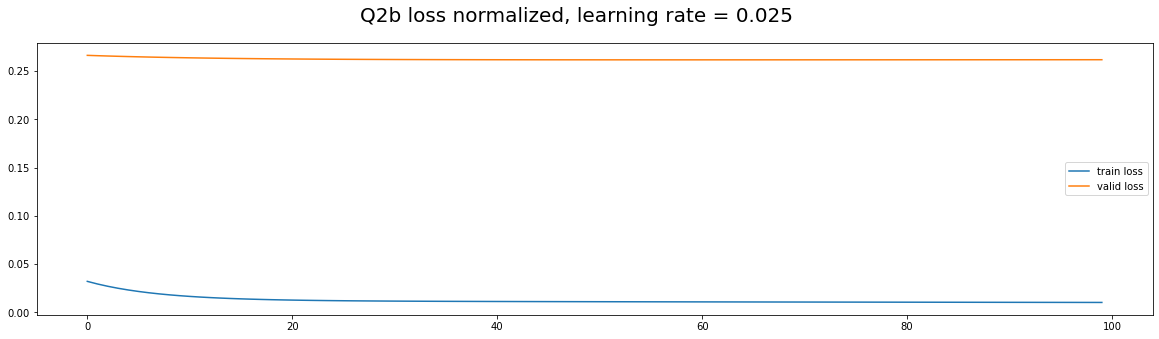

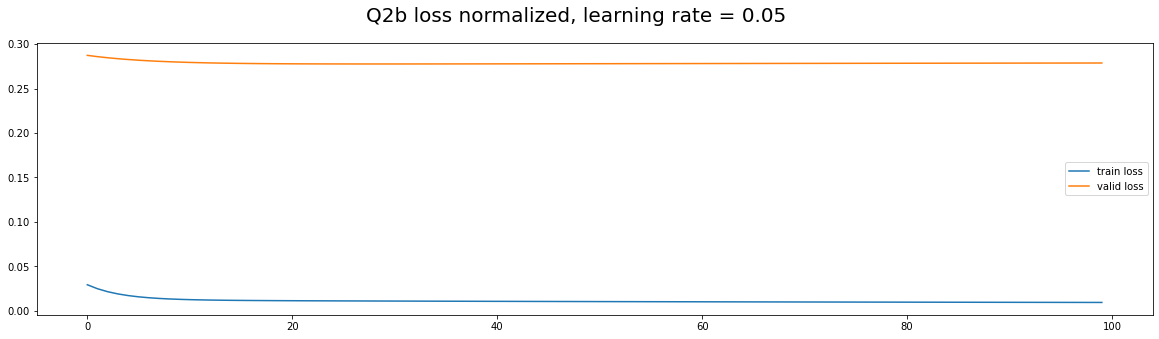

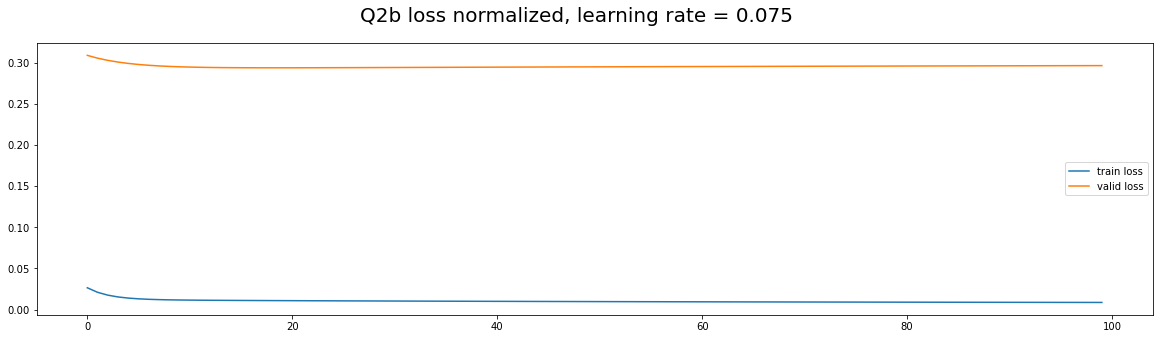

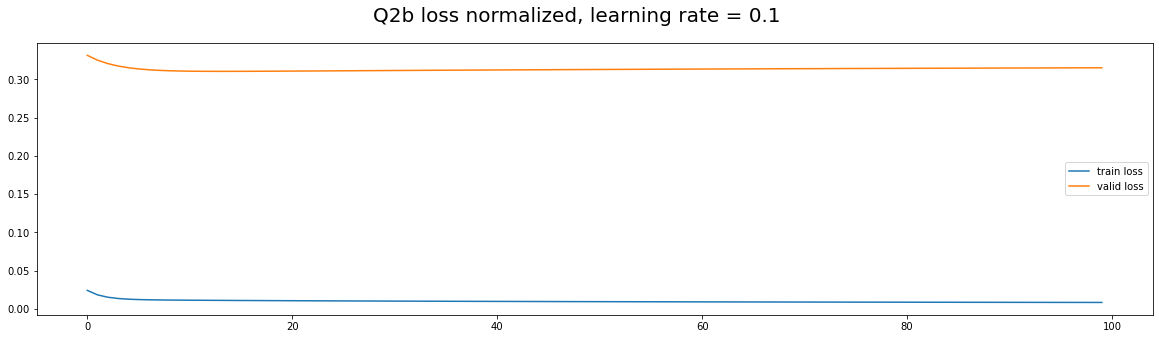

In [74]:
# plot normalized
iteration = np.arange(iterations)
for alpha in alpha_list:
    plt.figure(figsize = (20,5)).suptitle(f'Q2b loss normalized, learning rate = {alpha}',fontsize = 20)
    plt.plot(iteration,Q2b_cost_his_result_normalization[alpha],label = 'train loss')
    plt.plot(iteration,Q2b_valid_cost_his_result_normalization[alpha],label = 'valid loss')
    plt.legend()
    plt.show()

In [75]:
# standard
# learning rate alpha = [0.01,0.025,0.05,0.075,0.1]
iterations = 100;
alpha_list = [0.01,0.025,0.05,0.075,0.1]
Q2b_theta_result_standard = {}
Q2b_cost_his_result_standard = {}
Q2b_valid_cost_his_result_standard = {}
for alpha in alpha_list:
    theta = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
    theta, cost_hist,cost_valid_hist = gradient_descent(X_input_standard,
                                                        Y_standard,
                                                        X_input_valid_standard,
                                                        Y_standard_test,
                                                        theta,
                                                        alpha,
                                                        iterations,
                                                        train_size,
                                                        test_size)
    Q2b_theta_result_standard[alpha] = theta
    Q2b_cost_his_result_standard[alpha] = cost_hist
    Q2b_valid_cost_his_result_standard[alpha] = cost_valid_hist

In [76]:
Q2b_theta_result_standard

{0.01: array([2.72456307e-18, 2.15542254e-01, 1.19975148e-01, 2.21758867e-01,
        1.73523740e-01, 9.09685063e-02, 6.88487873e-02, 4.13969464e-02,
        5.35371062e-02, 1.68293794e-01, 1.41786118e-01, 1.16760154e-01]),
 0.025: array([8.88761214e-18, 2.66093396e-01, 1.05525446e-01, 2.76057191e-01,
        2.19936481e-01, 1.04072158e-01, 7.16354996e-02, 7.49505870e-02,
        9.21810988e-02, 2.04596305e-01, 1.59725327e-01, 1.45285958e-01]),
 0.05: array([6.54186533e-18, 2.77520822e-01, 8.20655513e-02, 2.88221602e-01,
        2.38730477e-01, 1.01474324e-01, 6.18372533e-02, 9.43226352e-02,
        1.06000842e-01, 2.09781114e-01, 1.56546680e-01, 1.48557927e-01]),
 0.075: array([-1.98878534e-17,  2.80185988e-01,  7.58927747e-02,  2.89918225e-01,
         2.44810269e-01,  1.00411624e-01,  5.83263057e-02,  1.00326189e-01,
         1.07497003e-01,  2.09467910e-01,  1.55835927e-01,  1.48163317e-01]),
 0.1: array([1.86785553e-17, 2.80978371e-01, 7.43120098e-02, 2.90089156e-01,
        2.468

In [77]:
Q2b_cost_his_result_standard

{0.01: array([0.4887971 , 0.47926026, 0.47006431, 0.4611969 , 0.45264614,
        0.44440054, 0.43644907, 0.42878106, 0.42138626, 0.41425479,
        0.40737711, 0.40074406, 0.39434678, 0.38817675, 0.38222577,
        0.37648592, 0.37094957, 0.36560938, 0.36045827, 0.35548943,
        0.35069626, 0.34607245, 0.34161188, 0.33730869, 0.33315718,
        0.32915192, 0.32528762, 0.32155923, 0.31796185, 0.31449078,
        0.31114146, 0.30790954, 0.30479079, 0.30178115, 0.29887671,
        0.2960737 , 0.29336847, 0.29075752, 0.28823748, 0.2858051 ,
        0.28345723, 0.28119085, 0.27900305, 0.27689102, 0.27485205,
        0.27288354, 0.27098297, 0.26914792, 0.26737606, 0.26566513,
        0.26401295, 0.26241746, 0.26087661, 0.25938848, 0.2579512 ,
        0.25656294, 0.25522199, 0.25392665, 0.25267531, 0.25146642,
        0.25029847, 0.24917002, 0.24807966, 0.24702605, 0.2460079 ,
        0.24502396, 0.24407301, 0.2431539 , 0.24226551, 0.24140675,
        0.24057659, 0.23977403, 0.23899808

In [78]:
Q2b_cost_his_result_standard

{0.01: array([0.4887971 , 0.47926026, 0.47006431, 0.4611969 , 0.45264614,
        0.44440054, 0.43644907, 0.42878106, 0.42138626, 0.41425479,
        0.40737711, 0.40074406, 0.39434678, 0.38817675, 0.38222577,
        0.37648592, 0.37094957, 0.36560938, 0.36045827, 0.35548943,
        0.35069626, 0.34607245, 0.34161188, 0.33730869, 0.33315718,
        0.32915192, 0.32528762, 0.32155923, 0.31796185, 0.31449078,
        0.31114146, 0.30790954, 0.30479079, 0.30178115, 0.29887671,
        0.2960737 , 0.29336847, 0.29075752, 0.28823748, 0.2858051 ,
        0.28345723, 0.28119085, 0.27900305, 0.27689102, 0.27485205,
        0.27288354, 0.27098297, 0.26914792, 0.26737606, 0.26566513,
        0.26401295, 0.26241746, 0.26087661, 0.25938848, 0.2579512 ,
        0.25656294, 0.25522199, 0.25392665, 0.25267531, 0.25146642,
        0.25029847, 0.24917002, 0.24807966, 0.24702605, 0.2460079 ,
        0.24502396, 0.24407301, 0.2431539 , 0.24226551, 0.24140675,
        0.24057659, 0.23977403, 0.23899808

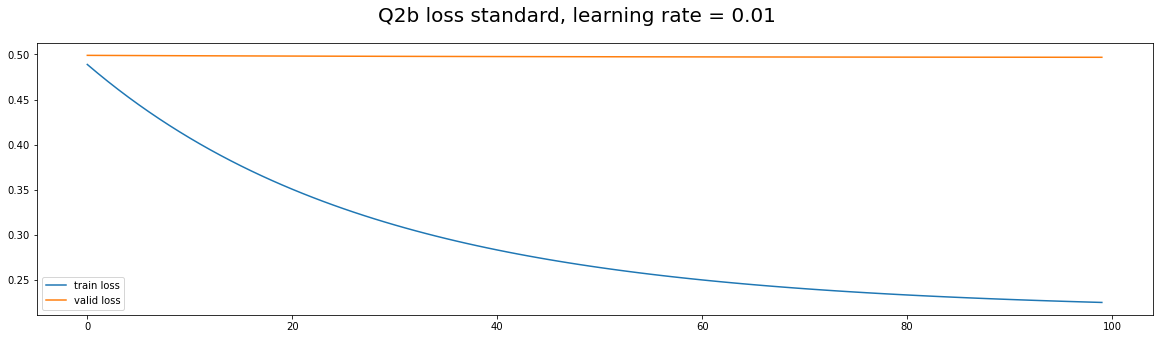

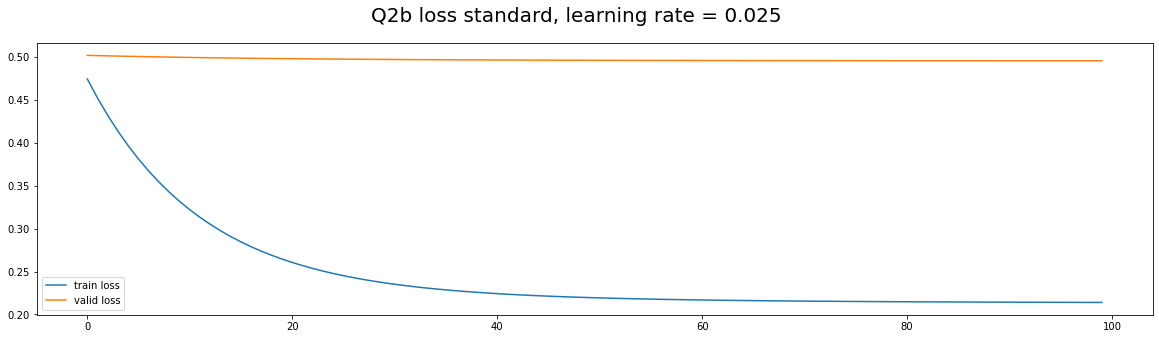

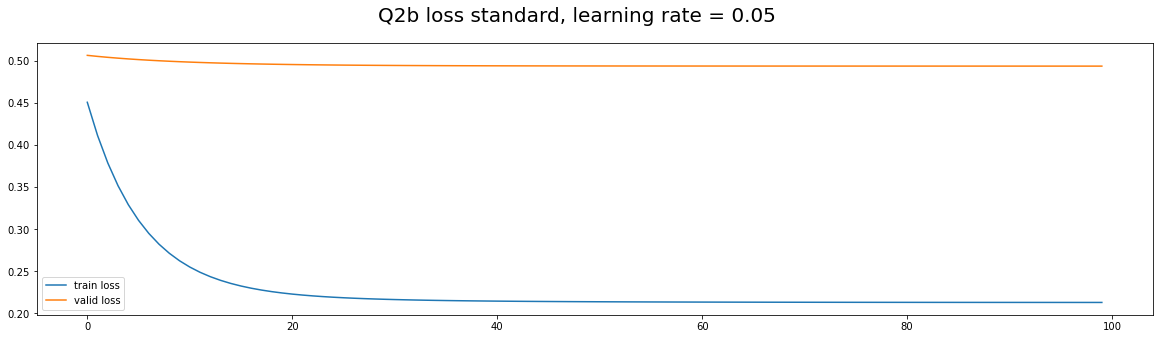

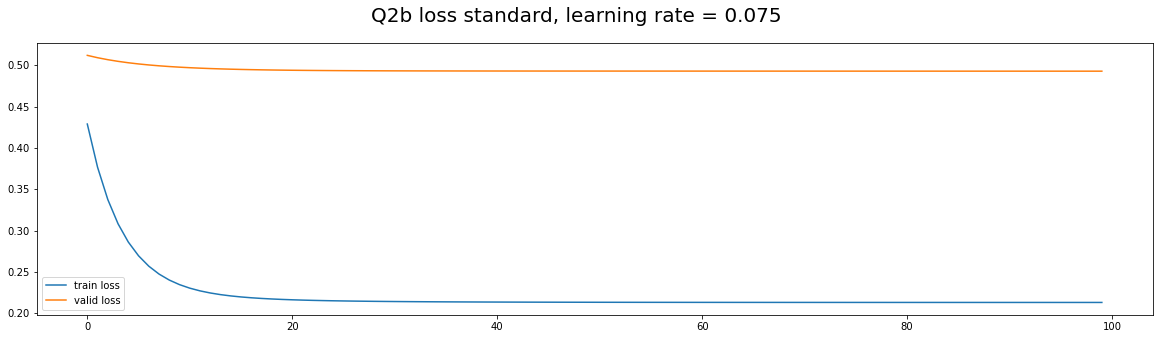

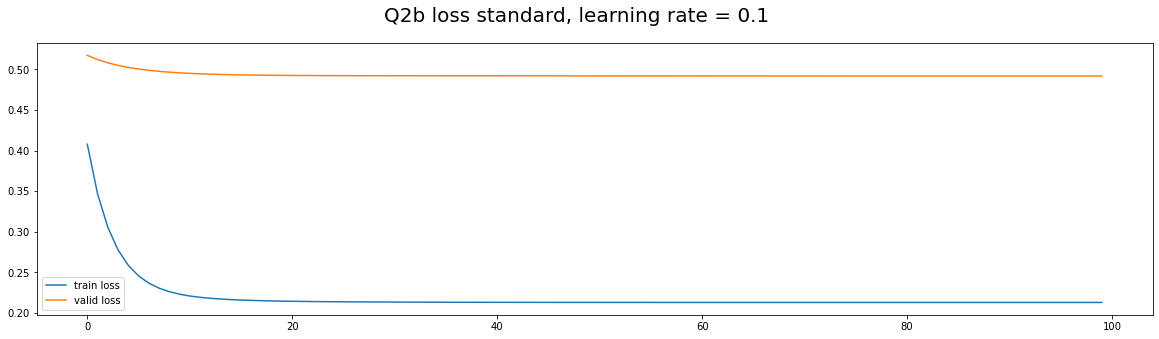

In [79]:
# plot standard
iteration = np.arange(iterations)
for alpha in alpha_list:
    plt.figure(figsize = (20,5)).suptitle(f'Q2b loss standard, learning rate = {alpha}',fontsize = 20)
    plt.plot(iteration,Q2b_cost_his_result_standard[alpha],label = 'train loss')
    plt.plot(iteration,Q2b_valid_cost_his_result_standard[alpha], label = 'valid loss')
    plt.legend()
    plt.show()

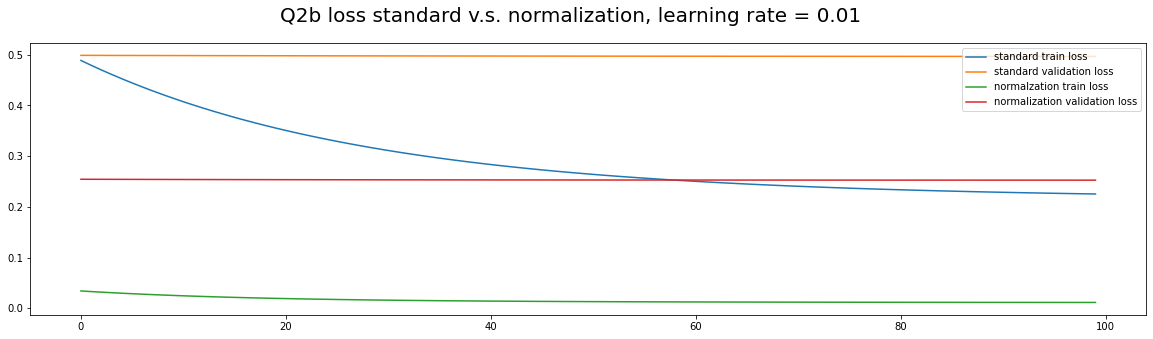

In [80]:
# based on the above result, learing rate = 0.01 is better
# then we comparae standard and normalized
plt.figure(figsize = (20,5)).suptitle(f'Q2b loss standard v.s. normalization, learning rate = 0.01',fontsize = 20)
plt.plot(iteration,Q2b_cost_his_result_standard[0.01],label = 'standard train loss')
plt.plot(iteration,Q2b_valid_cost_his_result_standard[0.01],label = 'standard validation loss')
plt.plot(iteration,Q2b_cost_his_result_normalization[0.01],label = 'normalzation train loss')
plt.plot(iteration,Q2b_valid_cost_his_result_normalization[0.01],label = 'normalization validation loss')
plt.legend()
plt.show()

## Q3.b

In [81]:
# add penalty, need to modify loss function

In [82]:
# Functions to compute cost and do gradient descent
# Functions to compute cost and do gradient descent
def compute_cost(X,Y,theta,m,lamda):
    pred = X.dot(theta)
    errors = np.subtract(pred,Y)
    sqrErr = np.square(errors)
    J = 1 / (2 * m) * (np.sum(sqrErr)+lamda*(np.sum(theta)-theta[0]))
    return J

def gradient_descent_with_penalty(X,Y,X_test,Y_test,theta,alpha,iterations,train_size,test_size,lamda):
    cost_history = np.zeros(iterations)
    cost_history_valid = np.zeros(iterations)
    for i in range(iterations):
        pred = X.dot(theta)
        pred_valid = X_test.dot(theta)
        errors = np.subtract(pred,Y)
        errors_valid = np.subtract(pred_valid,Y_test)
        sum_delta = (alpha / train_size) * X.transpose().dot(errors)
        sum_delta_valid = (alpha / test_size) * X_test.transpose().dot(errors_valid)
        theta = theta - sum_delta
        cost_history[i] = compute_cost(X,Y,theta,train_size,lamda)
        cost_history_valid[i] = compute_cost(X_test,Y_test,sum_delta_valid,test_size,0)
    return theta, cost_history, cost_history_valid


In [83]:
# Q3. normalization
# learning rate alpha = [0.01,0.025,0.05,0.075,0.1]

iterations = 500;
alpha_list = [0.01,0.025,0.05,0.075,0.1]
theta_result_normalization_penalty = {}
cost_his_result_normalization_penalty = {}
validation_cost_his_result_normalization_penalty = {}
lamda = 0.5
for alpha in alpha_list:
    theta = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
    theta, cost_hist,valid_cost_his = gradient_descent_with_penalty(X_input_norm,
                                                                    Y_norm,
                                                                    X_input_valid_norm,
                                                                    Y_norm_test,
                                                                    theta,
                                                                    alpha,
                                                                    iterations,
                                                                    train_size,
                                                                    test_size,
                                                                    lamda)
    theta_result_normalization_penalty[alpha] = theta
    cost_his_result_normalization_penalty[alpha] = cost_hist
    validation_cost_his_result_normalization_penalty[alpha] = valid_cost_his

In [84]:
theta_result_normalization_penalty

{0.01: array([0.03020034, 0.05179893, 0.04282533, 0.06151248, 0.07356313,
        0.04711709, 0.02673893, 0.01310918, 0.01873011, 0.07628907,
        0.06174511, 0.0486865 ]),
 0.025: array([-0.01285721,  0.09064391,  0.06288944,  0.11655426,  0.10797728,
         0.03315023,  0.03219008,  0.01341006,  0.03849432,  0.08435559,
         0.09511642,  0.06256057]),
 0.05: array([-0.05641464,  0.1414021 ,  0.07832811,  0.17480002,  0.13023517,
         0.03291114,  0.03239778,  0.02119599,  0.058524  ,  0.08007047,
         0.11555984,  0.06654847]),
 0.075: array([-0.08374639,  0.17995769,  0.08333681,  0.20983534,  0.1369138 ,
         0.04020497,  0.03039738,  0.0263061 ,  0.068268  ,  0.07744014,
         0.11774366,  0.06547569]),
 0.1: array([-0.10218524,  0.20984595,  0.08427179,  0.23216211,  0.13853363,
         0.0478304 ,  0.0286348 ,  0.02937562,  0.07317318,  0.07636053,
         0.11438002,  0.0637885 ])}

In [85]:
cost_his_result_normalization_penalty

{0.01: array([0.03408577, 0.0328715 , 0.03172397, 0.0306395 , 0.02961459,
        0.02864595, 0.02773046, 0.0268652 , 0.02604737, 0.02527435,
        0.02454367, 0.02385299, 0.02320008, 0.02258286, 0.02199937,
        0.02144772, 0.02092616, 0.02043303, 0.01996674, 0.01952583,
        0.01910888, 0.01871457, 0.01834164, 0.01798892, 0.01765528,
        0.01733967, 0.0170411 , 0.01675862, 0.01649133, 0.01623841,
        0.01599905, 0.01577251, 0.01555808, 0.01535508, 0.01516289,
        0.0149809 , 0.01480856, 0.01464533, 0.01449071, 0.01434421,
        0.0142054 , 0.01407385, 0.01394915, 0.01383093, 0.01371882,
        0.0136125 , 0.01351164, 0.01341594, 0.01332512, 0.0132389 ,
        0.01315703, 0.01307928, 0.01300541, 0.01293521, 0.01286848,
        0.01280502, 0.01274466, 0.01268723, 0.01263256, 0.01258051,
        0.01253092, 0.01248366, 0.01243861, 0.01239564, 0.01235464,
        0.0123155 , 0.01227812, 0.0122424 , 0.01220824, 0.01217558,
        0.01214431, 0.01211438, 0.01208569

In [86]:
validation_cost_his_result_normalization_penalty

{0.01: array([0.25443392, 0.25437938, 0.25432639, 0.25427492, 0.25422493,
        0.25417637, 0.2541292 , 0.25408339, 0.25403889, 0.25399567,
        0.25395369, 0.25391292, 0.25387332, 0.25383486, 0.25379751,
        0.25376123, 0.253726  , 0.25369179, 0.25365856, 0.2536263 ,
        0.25359496, 0.25356453, 0.25353499, 0.2535063 , 0.25347844,
        0.25345139, 0.25342512, 0.25339962, 0.25337486, 0.25335083,
        0.25332749, 0.25330483, 0.25328284, 0.25326148, 0.25324076,
        0.25322064, 0.25320111, 0.25318215, 0.25316375, 0.2531459 ,
        0.25312857, 0.25311175, 0.25309542, 0.25307959, 0.25306422,
        0.2530493 , 0.25303484, 0.2530208 , 0.25300718, 0.25299397,
        0.25298115, 0.25296872, 0.25295666, 0.25294496, 0.25293362,
        0.25292262, 0.25291195, 0.25290161, 0.25289158, 0.25288186,
        0.25287243, 0.2528633 , 0.25285444, 0.25284586, 0.25283754,
        0.25282948, 0.25282167, 0.25281411, 0.25280678, 0.25279968,
        0.2527928 , 0.25278614, 0.25277969

In [87]:
# Q3. standard
# learning rate alpha = [0.01,0.025,0.05,0.075,0.1]

iterations = 500;
alpha_list = [0.01,0.025,0.05,0.075,0.1]
theta_result_standard_penalty = {}
cost_his_result_standard_penalty = {}
validation_cost_his_result_standard_penalty = {}
lamda = 0.5
for alpha in alpha_list:
    theta = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
    theta, cost_hist,valid_cost_his = gradient_descent_with_penalty(X_input_standard,
                                                                    Y_standard,
                                                                    X_input_valid_standard,
                                                                    Y_standard_test,
                                                                    theta,
                                                                    alpha,
                                                                    iterations,
                                                                    train_size,
                                                                    test_size,
                                                                    lamda)
    theta_result_standard_penalty[alpha] = theta
    cost_his_result_standard_penalty[alpha] = cost_hist
    validation_cost_his_result_standard_penalty[alpha] = valid_cost_his

In [88]:
theta_result_standard_penalty

{0.01: array([1.67611623e-17, 2.77423856e-01, 8.23156249e-02, 2.88107041e-01,
        2.38559140e-01, 1.01510751e-01, 6.19434735e-02, 9.41413822e-02,
        1.05865185e-01, 2.09730509e-01, 1.56595430e-01, 1.48532334e-01]),
 0.025: array([1.27049144e-17, 2.81204451e-01, 7.39141593e-02, 2.90060250e-01,
        2.47533473e-01, 1.00078771e-01, 5.69181193e-02, 1.02921466e-01,
        1.07595492e-01, 2.08877794e-01, 1.55829610e-01, 1.47756635e-01]),
 0.05: array([3.49967940e-17, 2.81326992e-01, 7.37189404e-02, 2.90011665e-01,
        2.47913948e-01, 1.00049737e-01, 5.67377071e-02, 1.03277119e-01,
        1.07576741e-01, 2.08764937e-01, 1.55857672e-01, 1.47683924e-01]),
 0.075: array([-3.70001492e-17,  2.81327491e-01,  7.37182697e-02,  2.90011270e-01,
         2.47915639e-01,  1.00049658e-01,  5.67369165e-02,  1.03278708e-01,
         1.07576624e-01,  2.08764408e-01,  1.55857847e-01,  1.47683569e-01]),
 0.1: array([1.11022302e-17, 2.81327494e-01, 7.37182670e-02, 2.90011269e-01,
        2.479

In [89]:
cost_his_result_standard_penalty

{0.01: array([0.48881648, 0.47929867, 0.47012143, 0.4612724 , 0.45273969,
        0.44451184, 0.4365778 , 0.42892692, 0.42154896, 0.41443402,
        0.4075726 , 0.40095551, 0.39457393, 0.38841932, 0.38248349,
        0.37675852, 0.37123681, 0.365911  , 0.36077401, 0.35581905,
        0.35103953, 0.34642912, 0.34198173, 0.33769148, 0.3335527 ,
        0.32955993, 0.32570793, 0.32199161, 0.31840609, 0.31494668,
        0.31160883, 0.30838817, 0.30528049, 0.30228173, 0.29938798,
        0.29659547, 0.29390057, 0.29129978, 0.28878971, 0.28636713,
        0.2840289 , 0.28177199, 0.2795935 , 0.27749062, 0.27546065,
        0.27350098, 0.2716091 , 0.26978259, 0.26801912, 0.26631644,
        0.26467238, 0.26308486, 0.26155185, 0.26007143, 0.25864171,
        0.2572609 , 0.25592726, 0.25463912, 0.25339486, 0.25219292,
        0.2510318 , 0.24991006, 0.24882631, 0.2477792 , 0.24676743,
        0.24578976, 0.24484498, 0.24393194, 0.24304951, 0.24219662,
        0.24137222, 0.24057532, 0.23980495

In [90]:
validation_cost_his_result_standard_penalty

{0.01: array([0.49887595, 0.49882891, 0.49878275, 0.49873745, 0.498693  ,
        0.49864938, 0.49860658, 0.49856458, 0.49852335, 0.4984829 ,
        0.4984432 , 0.49840425, 0.49836601, 0.49832849, 0.49829167,
        0.49825553, 0.49822006, 0.49818525, 0.49815109, 0.49811756,
        0.49808465, 0.49805235, 0.49802065, 0.49798953, 0.497959  ,
        0.49792902, 0.49789961, 0.49787073, 0.49784239, 0.49781457,
        0.49778727, 0.49776046, 0.49773416, 0.49770834, 0.49768299,
        0.49765811, 0.49763369, 0.49760972, 0.49758619, 0.49756309,
        0.49754041, 0.49751816, 0.49749631, 0.49747486, 0.49745381,
        0.49743314, 0.49741285, 0.49739294, 0.49737338, 0.49735419,
        0.49733535, 0.49731685, 0.49729869, 0.49728087, 0.49726337,
        0.49724619, 0.49722932, 0.49721277, 0.49719651, 0.49718055,
        0.49716488, 0.4971495 , 0.4971344 , 0.49711958, 0.49710502,
        0.49709073, 0.4970767 , 0.49706293, 0.4970494 , 0.49703613,
        0.49702309, 0.49701029, 0.49699773

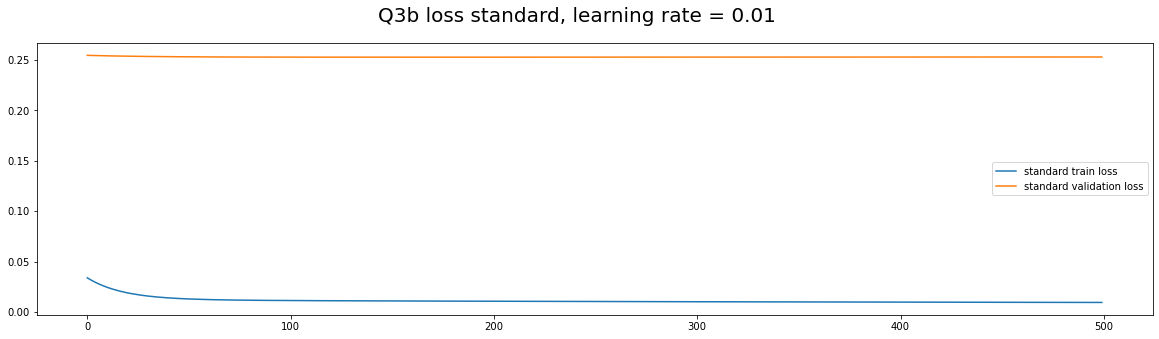

In [91]:
# plot
# based on the above result, learing rate = 0.01 is better
# normalized
iteration = np.arange(iterations)
plt.figure(figsize = (20,5)).suptitle(f'Q3b loss standard, learning rate = 0.01',fontsize = 20)
plt.plot(iteration,cost_his_result_normalization_penalty[0.01],label = 'standard train loss')
plt.plot(iteration,validation_cost_his_result_normalization_penalty[0.01],label = 'standard validation loss')
plt.legend()
plt.show()

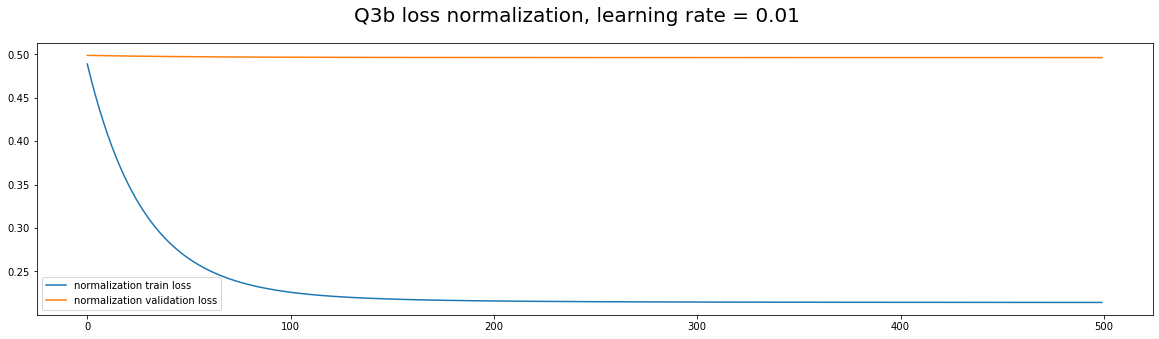

In [92]:
# plot
# based on the above result, learing rate = 0.01 is better
# standard a
plt.figure(figsize = (20,5)).suptitle(f'Q3b loss normalization, learning rate = 0.01',fontsize = 20)
plt.plot(iteration,cost_his_result_standard_penalty[0.01],label = 'normalization train loss')
plt.plot(iteration,validation_cost_his_result_standard_penalty[0.01],label = 'normalization validation loss')
plt.legend()
plt.show()

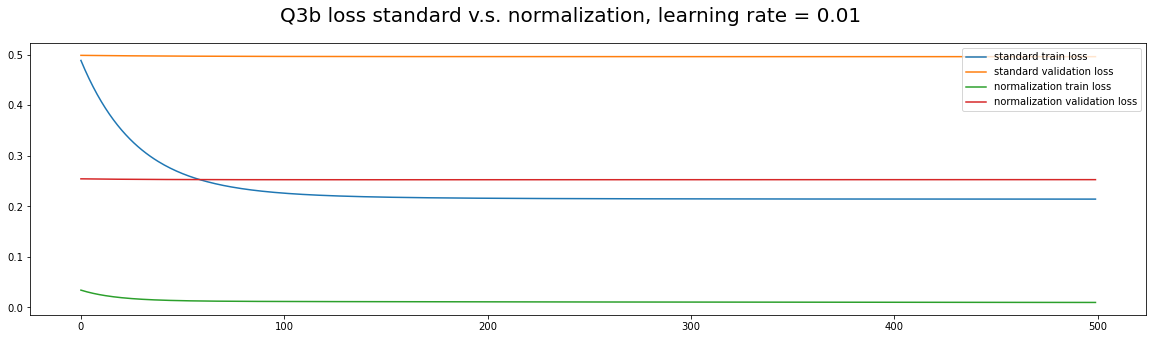

In [93]:
# plot
# based on the above result, learing rate = 0.01 is better
plt.figure(figsize = (20,5)).suptitle(f'Q3b loss standard v.s. normalization, learning rate = 0.01',fontsize = 20)
plt.plot(iteration,cost_his_result_standard_penalty[0.01],label = 'standard train loss')
plt.plot(iteration,validation_cost_his_result_standard_penalty[0.01],label = 'standard validation loss')
plt.plot(iteration,cost_his_result_normalization_penalty[0.01],label = 'normalization train loss')
plt.plot(iteration,validation_cost_his_result_normalization_penalty[0.01],label = 'normalization validation loss')
plt.legend()
plt.show()
